### Import libraries

In [17]:
import os
import sys
sys.path.append("..")
from model import experimental_model, experimental2d_model, grapher
from data import batch_creator, loader
from helpers import helpers, plotter, metrics
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D')
kernel = input()
print('How many observations? (deafult 150000)')
dataset_size = input()
print('Do you want to overwrite data? True/False')
rewrite = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = os.path.expanduser('~/Downloads/GPT_' + kernel)

Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D
rbf_const_2D
How many observations? (deafult 150000)
1
Do you want to overwrite data? True/False
False


In [3]:
data = loader.load_data(kernel, size = dataset_size, rewrite = rewrite.capitalize(), diff_x= True, noise = False, d = d, ordered = True)

['em_te_2.npy', 'pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy', 'em_tr_2.npy']


In [4]:
a = data[-4][1, :10].reshape(1, -1)

In [5]:
b = data[1][1, :10].reshape(1, -1)

In [6]:
c = data[-3][1, :10].reshape(1, -1)

In [7]:
dd = data[-1][1, :10].reshape(1, -1)

In [8]:
a

array([[264., 244., 340., 289., 314., 265., 254., 249., 285., 242.]])

In [9]:
b

array([[ 7.30813801,  5.38459099, 14.91017682,  9.8774689 , 12.35579582,
         7.4977443 ,  6.36305617,  5.85732549,  9.41111518,  5.15314729]])

In [10]:
c

array([[ 1.42948886,  3.97891532,  3.30185699, -0.46714584, -2.88594971,
        -3.64957459,  3.47368   , -0.58534392, -1.17222729, -0.57185026]])

In [11]:
dd

array([[0., 0., 0., 1., 1., 1., 0., 1., 1., 1.]])

In [12]:
batch_creator.create_batch_2d(a, b, c, dd, batch_s=1, context_p=2)

p:  0.33123832312318924


([array([[-0.57185026,  3.97891532, -0.58534392,  3.47368   , -3.64957459,
          -1.17222729, -0.46714584, -2.88594971,  1.42948886,  3.30185699]]),
  array([[ 5.15314729,  5.38459099,  5.85732549,  6.36305617,  7.4977443 ,
           9.41111518,  9.8774689 , 12.35579582,  7.30813801, 14.91017682]]),
  array([[242., 244., 249., 254., 265., 285., 289., 314., 264., 340.]]),
  array([[1., 0., 1., 0., 1., 1., 1., 1., 0., 0.]])],
 [8])

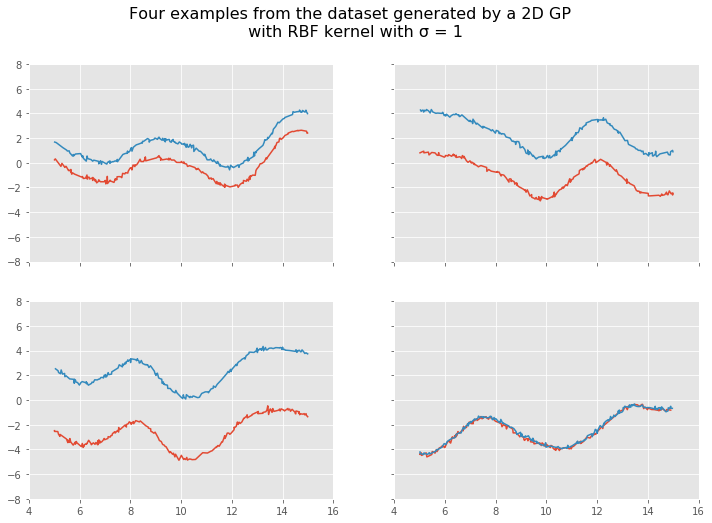

In [13]:
if d:
    plotter.plot_2d_examples(data[2], data[-2], data[0])
else:
    plotter.plot_examples(data[0], data[4])

In [18]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [19]:
# batch_x_tr, batch_tar_tr, _ = batch_creator.fake_batch(pad_x_tr, pad_y_fren_tr, batch_s=1)

Already exists
Initializing from scratch.
p:  0.35410306335159347
1
[0.027442761170807781 0.0062279882755821719 0.045221170324117307 ... -0.030622526733285985 0.0075574613732906984 0.015290817792691438]
p:  0.11763154272041232
1
[0.027442761170807781 0.0062279882755821719 0.045221170324117307 ... -0.030622526733285985 0.0075574613732906984 0.015290817792691438]


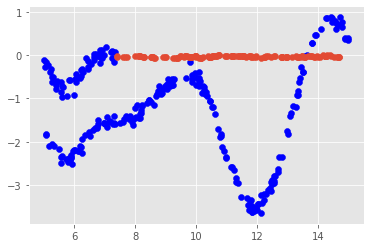

Epoch 0 batch 0 train Loss 1.9744 test Loss 2.1085 with training MSE metric 4.2049 and testing MSE metric 5.8188
learning rate is 0.0003000000142492354
r squared training, series 0: -2.0027036046686906, series 1: -5.782854017718315
r squared testing, series 0: -2.2223293666260364, series 1: -4.79088686215858
p:  0.7366585637919703
0
[-0.0024702330911474304 -0.037113642101595866 -0.0094256435694199964 ... -0.019693811802738798 -0.0085713804470449878 -0.02441195347838581]
p:  0.762620837937661
0
[-0.0026712442290723181 -0.036912659179149508 -0.00962654609077357 ... -0.019492801706645597 -0.0087723874487131669 -0.024612957448776597]
p:  0.996200688978341
1
[0.026962341029127927 0.0066716478668540219 0.045636335516147347 ... -0.03015153299858285 0.0070775870428657376 0.014871571109809509]
p:  0.6490287516796948
0
[-0.002953906044665687 -0.036630037068947532 -0.0099090550589778989 ... -0.019210141357138971 -0.0090550434436820291 -0.024895609178070412]
p:  0.044605356944623975
0
[-0.00306148

p:  0.11753614916002642
0
[-0.0042126109276273494 -0.034896791480777734 -0.0080861916660242752 ... -0.01765738378395464 -0.010768272723807405 -0.024297611543514536]
p:  0.48950278128527436
0
[-0.0043001537111088109 -0.03483278339720236 -0.00784968272805173 ... -0.017496100012311441 -0.010919601476891043 -0.024158838401925842]
p:  0.0783978509901252
0
[-0.0043916606520806763 -0.034799367983791581 -0.0075972209302123794 ... -0.017337492008608443 -0.011079773176340204 -0.024000792883701726]
p:  0.10774103516377798
1
[0.023945682738755025 0.0080516343078109176 0.046485806146078286 ... -0.028059832885639933 0.0043208751832513447 0.016675340708486495]
p:  0.6172371195132059
1
[0.023827215437348077 0.0080719093306858142 0.046596003935942064 ... -0.028009858823676962 0.0042252410536491045 0.016794035230928542]
p:  0.443336480358715
1
[0.023709414277709718 0.0080762617529423954 0.046726220943489605 ... -0.027968922143758419 0.0041330554930473409 0.016920750730687297]
p:  0.3166672321960029
1
[0

p:  0.45592089527639434
1
[0.02312370544700872 0.008044954945460361 0.047480121896147441 ... -0.027838599095869523 0.0037046238441306458 0.017610585488307795]
p:  0.019082147793044957
0
[-0.0052162216668449612 -0.034977075700056072 -0.0050508172418250487 ... -0.016396294821638478 -0.012602485884169928 -0.022099337664832769]
p:  0.37321027674094354
0
[-0.00529479124317012 -0.035017883185925351 -0.00481786115002166 ... -0.016371111180272419 -0.012718567150008738 -0.021913387535299939]
p:  0.6603409253513892
1
[0.022858286339354848 0.00797118521287936 0.047925784899505622 ... -0.027853754864333596 0.0035364802678944387 0.017983580169302332]
p:  0.8396174600937997
0
[-0.0054568186199004977 -0.035131183892034866 -0.0043575576592609988 ... -0.016349329364002019 -0.0129432930901716 -0.021547742475382284]
p:  0.9605821457431031
0
[-0.0055271951250678176 -0.035180395992475112 -0.0041576250814358588 ... -0.016339868443658159 -0.013040902682584288 -0.021388924738319784]
p:  0.7089030909354982
1
[

p:  0.011172893047180277
1
[0.022089286272476971 0.0075319383644393747 0.04905279185563536 ... -0.0280600925555469 0.0031579571159618138 0.019322196207640897]
p:  0.13361183709747515
0
[-0.0060994643030410928 -0.035800806817510418 -0.0027892918590328472 ... -0.016370343441406296 -0.01377617547948016 -0.020241911964585559]
p:  0.7114720876704236
0
[-0.0061831308462220753 -0.035928360132081165 -0.0026220279807256932 ... -0.016385769265775091 -0.013883012907816739 -0.020100606463921332]
p:  0.9414890112597858
1
[0.021921485824341967 0.0074347030114094905 0.049306604780972207 ... -0.028117112416565261 0.003080730920308103 0.019642889930688856]
p:  0.4876968476367316
1
[0.021859573418388133 0.00739265066061573 0.049420614032879347 ... -0.028146185393530726 0.0030565400997718843 0.019783019533747954]
p:  0.6648075254078517
1
[0.02180324686048226 0.0073543923486808259 0.049524337163415394 ... -0.028172635354627915 0.0030345318182422912 0.019910506393262407]
p:  0.8435229979468553
1
[0.0217445

p:  0.6280312418445867
0
[-0.0068250188083960241 -0.036851210843783767 -0.0014758075842435405 ... -0.016492378291471592 -0.01468977775311844 -0.019108254071316461]
p:  0.3989676680862094
1
[0.021443754946006161 0.0070718979756586092 0.04995133235273358 ... -0.028397756939315143 0.0029389963645596751 0.020900944685814694]
p:  0.3432361203843325
1
[0.021420545061836941 0.0070381973507646391 0.049965779514758557 ... -0.028418929280412442 0.0029341206690888626 0.020983449673008026]
p:  0.4687765352896692
1
[0.02139945978600644 0.0070075816459793513 0.049978904198476858 ... -0.0284381635278154 0.0029296912896217566 0.021058402240620069]
p:  0.23197443781949578
0
[-0.0070295342324478349 -0.037342524762089283 -0.0010734214899446618 ... -0.016528593461190434 -0.015007424790811389 -0.018993403661425719]
p:  0.5117745587717387
0
[-0.0070819439750911817 -0.037499736366960447 -0.00096394878584739742 ... -0.016530206594174642 -0.015103143609153737 -0.019005263153901081]
p:  0.4217692645713642
0
[-0

p:  0.47722756477365924
0
[-0.0074186742913283062 -0.038320593299430807 -0.0004230871636804037 ... -0.016483949397194192 -0.015647837848483965 -0.019069056405450539]
p:  0.30194627643698524
0
[-0.0074803579910729875 -0.038414581168677048 -0.00035061551190605127 ... -0.016489586390026307 -0.015725191635640342 -0.0190247579131732]
p:  0.7113290856451104
0
[-0.0075525563608827423 -0.038518955301244225 -0.00027728722319235688 ... -0.01648757721854505 -0.015813177243854032 -0.018980496035328556]
p:  0.6831132498062161
1
[0.021230474845193244 0.0068948921645067413 0.050076106988236731 ... -0.028709788781138453 0.0029559255815263781 0.021981847147913829]
p:  0.41247327050838245
1
[0.021231714135088873 0.0069187149782406745 0.050076940018846786 ... -0.028738097488934168 0.0029658612402631468 0.022060839716719641]
p:  0.276851886276835
0
[-0.0077256636903657652 -0.038798401548057228 -9.7551555676537812e-05 ... -0.016465107046368353 -0.016037683363287758 -0.018908425874960475]
p:  0.310296782975

p:  0.7514921444402675
1
[0.021242576302698348 0.0070690218537440928 0.050084291366394147 ... -0.028893543332380058 0.0030216509659257477 0.022492437571471013]
p:  0.7098384993635575
1
[0.021248418761321549 0.007129187377609294 0.050094753100951135 ... -0.028921441943943919 0.0030334662545165 0.022567028456592111]
p:  0.9200555674752648
1
[0.021252056624287283 0.0072037702531118838 0.050067079410197848 ... -0.028950528343481521 0.0030529937189016209 0.022652126346919883]
p:  0.1173378839906053
1
[0.021263885164417337 0.0072956699657846687 0.050092510369961624 ... -0.028990214142283463 0.0030715589480349247 0.02275911572804994]
p:  0.9556792005636005
0
[-0.0082434158318373234 -0.04033986566515816 0.00043003115907350707 ... -0.015948338172728678 -0.017051699699514204 -0.019474428363938721]
p:  0.18007322699971384
0
[-0.00829781467619165 -0.040466794849293941 0.00047448202007037931 ... -0.01591508909085346 -0.017141524677669624 -0.019488391103240917]
p:  0.6985667309342369
1
[0.0213103745

p:  0.20047740789915858
1
[0.021468343445617117 0.0081351733353530326 0.050035526375309759 ... -0.029219106324458188 0.0032409848163124427 0.0233049041332459]
p:  0.14772877947311625
1
[0.021501907313903713 0.0082488464250352889 0.050023927922725947 ... -0.029242415647518429 0.0032620922885817196 0.023354445840219295]
p:  0.5927880646847584
1
[0.021532297268590472 0.00835177019921364 0.050013426259528176 ... -0.029263520761780015 0.0032812037665410354 0.023399302714811807]
p:  0.18205109385545093
0
[-0.00884796742755396 -0.041861985042963824 0.00080308644908080634 ... -0.015461242103054032 -0.0180017459257618 -0.01981048614248453]
p:  0.37494917199241307
0
[-0.0089230341651489152 -0.042058772489609847 0.00083207678337522955 ... -0.015394569023337489 -0.018117314493826284 -0.019879358762608643]
p:  0.8338106880007593
0
[-0.0090000412386466062 -0.042268494075005818 0.00086321241488080216 ... -0.015322418657557473 -0.018246941255027412 -0.019960536240390306]
p:  0.2700904267019776
1
[0.02

p:  0.2541151478524182
1
[0.021938003333838461 0.0096311658187537251 0.049984778322503663 ... -0.02949922431687255 0.0035946585735899517 0.023909979238748127]
p:  0.09905030864791631
0
[-0.0094692647920365542 -0.043664325810402811 0.0010126543917580674 ... -0.014791658123492936 -0.018991587530583779 -0.020650094350984898]
p:  0.0034759706844423865
0
[-0.00953299450638907 -0.043863707584343006 0.0010274020045029134 ... -0.014713002136295967 -0.019083316750293809 -0.020757484853801987]
p:  0.43369524913232316
0
[-0.009606232715898463 -0.044086401253996745 0.0010589927102280026 ... -0.014633854899799396 -0.019208070722423545 -0.02087517538068856]
p:  0.6263047255260918
1
[0.022078018686369709 0.01013771212065368 0.050096668311608153 ... -0.029614223333432055 0.0037452084059119541 0.024222819168233677]
p:  0.8848576628064447
0
[-0.00977002354235998 -0.044567967733608313 0.0011180625868628072 ... -0.014471318595618756 -0.019475037019378295 -0.021103405464293304]
p:  0.19997064420894772
0
[-

p:  0.27999831880705495
0
[-0.0104259779044382 -0.046383945168314795 0.0012977611880821197 ... -0.013892005496100984 -0.020671581466674846 -0.021954993073299945]
p:  0.13110274313164838
0
[-0.010529720953518328 -0.04667185576838552 0.0013414296374709587 ... -0.013805602312733836 -0.020855180742733792 -0.022079485849224131]
p:  0.758761993905194
0
[-0.010615001673684291 -0.046941255799799984 0.0013739484723489595 ... -0.013708076927846063 -0.021010755873092337 -0.022232119695536123]
p:  0.7564640033757539
0
[-0.010692118856659336 -0.047184867384098328 0.00140335442647287 ... -0.013619887206517767 -0.0211514385003777 -0.022370142594631243]
p:  0.26044006326550284
1
[0.022599134640035268 0.011578973018903586 0.050311726414941194 ... -0.029873119498992736 0.0041686278157574723 0.024747591950144813]
p:  0.12689818542618725
0
[-0.010831301617707071 -0.047625490489392693 0.0014511536257661045 ... -0.013452950877883736 -0.021386329585579584 -0.022621562976168234]
p:  0.2812816964030648
1
[0.02

p:  0.5917704557157096
1
[0.023008247910968907 0.012559567262725528 0.050545648497736177 ... -0.030020140222302469 0.0044558726571791926 0.024987334106038511]
p:  0.012144007294612291
1
[0.023060335341075464 0.01268994980053988 0.050589549663066752 ... -0.030040814670058286 0.004492736757562751 0.025018676713630748]
p:  0.024317477862690118
0
[-0.011584260413120695 -0.049379151088438378 0.001497099017019838 ... -0.012836087122698405 -0.021968496282407043 -0.023304071478405766]
p:  0.32285921186585564
1
[0.023149974697609835 0.01291433035802252 0.0506651009444678 ... -0.030076394160231532 0.004556177673248429 0.025072615469554842]
p:  0.04833529276486248
1
[0.023188439878881549 0.013010614390031856 0.050697520784966331 ... -0.030091661690061618 0.0045834008309621468 0.025095761151388771]
p:  0.5532008229664127
0
[-0.0117628964232974 -0.049971970588095591 0.0014616882789597857 ... -0.012571581511601339 -0.022114061207671794 -0.023675859912945841]
p:  0.7253467206818519
1
[0.0232659027374

p:  0.7815910048812019
0
[-0.012334640565911268 -0.05133298160053773 0.0013832741224847924 ... -0.012100179560439373 -0.022596856731878074 -0.024180389828142489]
p:  0.9668195481480685
1
[0.023604584932116143 0.014169608196227597 0.051067376166128157 ... -0.030265653709500635 0.0048673236520012106 0.025317694585259069]
p:  0.5581106688630137
0
[-0.012516154592427279 -0.051680919263818161 0.001387797304495556 ... -0.0120124942418061 -0.022743615905856468 -0.024217397027047675]
p:  0.9342423340166857
1
[0.023719456859984611 0.014477960524075392 0.051129111078493411 ... -0.030301659694617879 0.0049555931023379475 0.025342484670257549]
p:  0.4448375829566642
0
[-0.012664346027080796 -0.051964982053753432 0.0013914901146149673 ... -0.011940906313347193 -0.022863432830604519 -0.024247610393955583]
p:  0.7153566088109242
1
[0.023857702224453107 0.014834237042422654 0.051202894630066081 ... -0.03034833288886031 0.0050623844902718687 0.025395630464374368]
p:  0.37330230795131036
1
[0.0239241119

p:  0.8317715486597761
0
[-0.013121948460610076 -0.052885817799048745 0.0013483684590189289 ... -0.011677613720561759 -0.023275406544401557 -0.024432360684915846]
p:  0.99744836980457
0
[-0.013172796491009702 -0.05298112915976249 0.001349817051343368 ... -0.011654288004293368 -0.023327522117527782 -0.024447716447072186]
p:  0.487322983037747
0
[-0.013218727939001564 -0.053067224702607475 0.0013511255768183352 ... -0.011633217691162627 -0.023374598547301454 -0.024461587434486478]
p:  0.09575300136205511
0
[-0.01325680559775573 -0.053136207345766108 0.001356256515625125 ... -0.011618238453886973 -0.023410681650965191 -0.024470315076039775]
p:  0.8290441385864122
1
[0.024472962096215831 0.0164155441784782 0.051012222473668968 ... -0.030515782758131976 0.0056170591675811935 0.0255067120474805]
p:  0.9989192966501518
0
[-0.013333312104851752 -0.053274864328241057 0.0013819558795908876 ... -0.011590991269008165 -0.023472885655694754 -0.02448671932520808]
p:  0.0898225253947128
0
[-0.01336610

p:  0.37722687965738955
0
[-0.01364277221553631 -0.053732617345289474 0.0015363291724587919 ... -0.011536342783149158 -0.023654199923657818 -0.024416992899006222]
p:  0.14573607469637928
1
[0.024748483494905726 0.017146121740441438 0.0509088629885159 ... -0.030636054992708991 0.0058396308665451344 0.025591712823431097]
p:  0.9698584971130573
1
[0.024767168092094435 0.017194093626515378 0.050871590502102222 ... -0.030642954271974367 0.0058564255133466648 0.025583537780247023]
p:  0.4099207920768596
0
[-0.013656857632269728 -0.05377858089899358 0.0015985927366979913 ... -0.011518214558778517 -0.023569086919341072 -0.02439784521455611]
p:  0.877557751984914
1
[0.024786958152577337 0.017238421990888174 0.050747183652869232 ... -0.030646442601052006 0.0058756274855384805 0.025542461014393832]
p:  0.46618064348186716
1
[0.024806014663051695 0.017291645147826353 0.050714462340530612 ... -0.030654567213710671 0.0058904225965677954 0.0255502740271992]
p:  0.11181146177834611
1
[0.02482322279523

p:  0.7304866120863258
0
[-0.013980109212946838 -0.054587806311809074 0.0016420528330424432 ... -0.011253721125897649 -0.023920527230132223 -0.0247008303806197]
p:  0.902632051173224
0
[-0.014022070388536229 -0.054692683365465344 0.001643313641922395 ... -0.011220100797185339 -0.023977418127236569 -0.024742414082188677]
p:  0.5348958920317957
0
[-0.014059956099898194 -0.05478737427217014 0.0016444519951907804 ... -0.011189745830960921 -0.024028783516166753 -0.024779958981486647]
p:  0.7329006562808338
1
[0.025009765614234115 0.017943947071347905 0.050669948227249496 ... -0.030743783898022705 0.0060595131024144232 0.025816551277416656]
p:  0.3869085853094978
1
[0.025059550137431542 0.018056060828242067 0.050728288344001407 ... -0.030763649475512515 0.0060898433806734461 0.025868224400928362]
p:  0.8232812150247534
0
[-0.014146023208055667 -0.055024551615258849 0.0016378232607756143 ... -0.011106385311892727 -0.024166773931413366 -0.024908610658967854]
p:  0.8991799605165118
0
[-0.014164

p:  0.9431478925397486
1
[0.025320830561737635 0.018491223319467211 0.051084969305761833 ... -0.030849214305595233 0.0062342423179138542 0.026092413916102883]
p:  0.2755058826339143
0
[-0.014219203961706589 -0.055268330628935811 0.0017114339900360415 ... -0.011067000774104902 -0.024427179704354429 -0.02503746231419764]
p:  0.9638267719545706
1
[0.025355880916313717 0.018590187995134306 0.051141215736753738 ... -0.0308665153673588 0.0062513361153545815 0.026170086474065945]
p:  0.6921336440457437
0
[-0.014209584450002583 -0.055235532883601675 0.0017894859686841188 ... -0.011117389201357733 -0.024421228194197973 -0.024937835449065308]
p:  0.8976742371911164
1
[0.025374602643406505 0.01864567586512569 0.051184726618243366 ... -0.030884945380437779 0.00625367131471439 0.026228847060694362]
p:  0.7335631770331599
1
[0.025381856909359773 0.018675243283077566 0.051220031802317691 ... -0.030894899078749153 0.0062505890408365234 0.026256004875419056]
p:  0.1646006812790609
0
[-0.014198389660706

p:  0.6001355125272437
0
[-0.014264824914634995 -0.055381669347163667 0.0019769554286720812 ... -0.01119582832022625 -0.024595172848667985 -0.024806885849692154]
p:  0.7029687933667306
1
[0.025352961208281236 0.01863005749040032 0.051136649064175518 ... -0.030904244782781733 0.0062128239963356027 0.026251847730961737]
p:  0.9852260646241856
1
[0.025335809965518236 0.018582484103329921 0.051066731445027734 ... -0.030894739028409446 0.006212653793569548 0.026225194699206991]
p:  0.7797380998288135
0
[-0.014326323612692822 -0.055521017992819457 0.0020131551402401688 ... -0.011184304949753384 -0.024731383615038734 -0.024826348160595715]
p:  0.04613774343149357
1
[0.025277457710772212 0.018441399639875958 0.050810838530605723 ... -0.03085516154489552 0.0062008941435465655 0.026111523544300207]
p:  0.7324769463301205
0
[-0.014411621553411053 -0.055683624041564073 0.002043769626234474 ... -0.011161748133565784 -0.02488515324590795 -0.024860224864624525]
p:  0.58641344810891
0
[-0.014473585632

p:  0.9867611672183946
1
[0.025177093802147513 0.018373768206507931 0.050201682722478359 ... -0.030775183022307515 0.0061910314869939084 0.025963008536630788]
p:  0.31799744035828037
0
[-0.014600494114059339 -0.056123364420088348 0.0020498962109859369 ... -0.011047734737475919 -0.02526682836148457 -0.025079565498474142]
p:  0.1017422992678022
1
[0.025195347807585509 0.018439047264415108 0.050219281347488896 ... -0.030771011778499453 0.00619072507595947 0.025957060175059214]
p:  0.32925216531488233
1
[0.025203161578067124 0.018466990477783263 0.050226814577024749 ... -0.030769226244792315 0.0061905939143071607 0.025954513932137928]
p:  0.3149287780089497
0
[-0.014393618905829485 -0.055803597222928693 0.0020102494065674273 ... -0.01111791659088879 -0.025046003785733344 -0.025020052603874542]
p:  0.3337749244056225
1
[0.025216575482827235 0.018514960609327755 0.050239746876627106 ... -0.030766161017916863 0.0061903687490134727 0.025950142795287647]
p:  0.5027231565394735
0
[-0.01423039425

p:  0.9720793790023147
0
[-0.013991246704873762 -0.055075141487315939 0.0020739721691902784 ... -0.011369635936371929 -0.024488094971280811 -0.024589427818746224]
p:  0.7978737058869793
1
[0.025222452378558618 0.018639680012834656 0.050221213567020667 ... -0.030767919978930452 0.0061288182374384112 0.026001263852011271]
p:  0.4876725686440514
0
[-0.013996550760310209 -0.055068138869329486 0.0020590799560200245 ... -0.011381228739286034 -0.024482009407722442 -0.024549054748627838]
p:  0.3436909532615595
0
[-0.014007199071983579 -0.055094877041152408 0.0020520109176800157 ... -0.011370911971910454 -0.024494981326177816 -0.024556085374806167]
p:  0.7230309284453932
1
[0.025237982427777764 0.018697700527454425 0.050213901301348667 ... -0.0307813008074359 0.0061089508172878114 0.026017198734209369]
p:  0.5569943247933863
0
[-0.014015613751508282 -0.055145729509888324 0.0020291388078692157 ... -0.011345568655586051 -0.024527025414629998 -0.024596062018883185]
p:  0.6188471770948156
1
[0.0252

p:  0.3959966062394912
1
[0.025251248621457948 0.018873842229431309 0.050358312463838463 ... -0.030768632476092978 0.0061733479415831171 0.025985489880339076]
p:  0.22691576938487878
1
[0.025267987083016894 0.018909085337207702 0.050437409107246554 ... -0.030776045024260172 0.006189782644269161 0.026008152569677444]
p:  0.8190157324392694
1
[0.025283088333196112 0.018940881269061061 0.050508769200624956 ... -0.030782732541182533 0.0062046098467134284 0.026028598590991367]
p:  0.23260883845668623
1
[0.025292942232402579 0.018958693476617852 0.050547039103067681 ... -0.030785087357705194 0.006218455756832073 0.026033327305788143]
p:  0.6456803630790634
1
[0.025301832143362197 0.018974763149596768 0.050581565133034967 ... -0.030787211807010467 0.0062309471479204733 0.026037593419400724]
p:  0.9736436303606374
0
[-0.013954199367127355 -0.055119429060441996 0.0018831450071748958 ... -0.011279674678795823 -0.024452405562484694 -0.024694316061279559]
p:  0.34938040214877963
1
[0.0252855807394

p:  0.5997608886037105
0
[-0.013922176935208166 -0.054947591017259642 0.0019148044176218694 ... -0.011379888756832466 -0.024333671322796565 -0.024521562169276184]
p:  0.10096958762559072
0
[-0.013916178626010339 -0.054928192961286378 0.0019205804567608395 ... -0.011388342718987875 -0.024326203647362144 -0.024509311106102612]
p:  0.4180011354762905
1
[0.025146416542710666 0.018453623067137308 0.050662051276870054 ... -0.030752231105347121 0.0061701789010133517 0.025971562210621905]
p:  0.14310094852428001
0
[-0.013979618370684529 -0.05504240121461261 0.0019879611083836166 ... -0.0113804859171568 -0.024422041597355438 -0.0244958282844112]
p:  0.09124309602603686
1
[0.02510963897910394 0.018335942401403738 0.050656021115321977 ... -0.030746603032166205 0.00615058803767407 0.025948103908226924]
p:  0.058509603813771904
1
[0.025093904999679627 0.01828559689266988 0.050653441324114125 ... -0.030744195260153595 0.0061422067798405288 0.025938068103468666]
p:  0.3639613296402894
0
[-0.014035081

p:  0.03754059768101137
1
[0.024981003095233583 0.017950442076910249 0.050492143443783256 ... -0.03070740254574604 0.0060988566100876624 0.0257980053075966]
p:  0.23583569133909366
0
[-0.013916589853993095 -0.054973101202365628 0.0021221318383267064 ... -0.011497404604733471 -0.024587401069753732 -0.024397194933380738]
p:  0.9015635621226413
0
[-0.013925319369884797 -0.054968628766762874 0.0021305964510509156 ... -0.011506016797559538 -0.024615560848780103 -0.024382996440194826]
p:  0.10797887601233414
0
[-0.013933193376838269 -0.054964594638256023 0.0021382315158525829 ... -0.011513784979313581 -0.024640960916603862 -0.02437018942600901]
p:  0.5212701543189888
0
[-0.013912777531116891 -0.054934224200004329 0.002140813118438964 ... -0.011517516479414763 -0.024632567156921394 -0.024368033887141972]
p:  0.4173055304816863
0
[-0.013894362754955304 -0.0549068305358879 0.0021431416839299577 ... -0.011520882234618782 -0.024624996115891938 -0.02436608962452318]
p:  0.6306027657371138
1
[0.025

p:  0.7456562702117872
1
[0.025206460004480177 0.018835774410622431 0.051410328049137623 ... -0.030876203574034321 0.00624866693371281 0.026412777954010615]
p:  0.6445342928940707
0
[-0.013546203056382383 -0.054494050757430613 0.0020087053941298658 ... -0.011565245304830326 -0.024318166962853379 -0.02438552258807359]
p:  0.18905783394522768
1
[0.025178210743433758 0.018854138399151749 0.051340677147541959 ... -0.030858687171272884 0.0062474915341933484 0.026381892992762397]
p:  0.09383017086369494
1
[0.025161267115168716 0.018853828451558835 0.0513016047154737 ... -0.030848728949020156 0.0062448161017813362 0.026362720499743249]
p:  0.5938179603246624
1
[0.025145985433979747 0.018853548905750181 0.05126636477561599 ... -0.030839747497343851 0.0062424030940871631 0.026345428576092397]
p:  0.4668231886728277
0
[-0.013561905854764371 -0.054511910896856641 0.0018828922791245377 ... -0.011506268962298807 -0.024410911602662677 -0.024548629132822106]
p:  0.9612602234237166
0
[-0.0136024312606

p:  0.7225513751279645
0
[-0.013897467196139796 -0.055117364478635453 0.0018122841668257595 ... -0.011301896342648131 -0.024883015773520752 -0.024890288574171551]
p:  0.3879481658334748
0
[-0.013922390450552774 -0.055182325968074777 0.0018069055584093189 ... -0.011274733963103405 -0.024915696839362969 -0.024926974881969655]
p:  0.31196714180824503
1
[0.024978725663301869 0.018725887508942642 0.050834176074031623 ... -0.030713519755442162 0.00619842856792852 0.026067685000568549]
p:  0.04909260002499416
1
[0.024966402458107082 0.018710360254946497 0.050803386909067626 ... -0.030700702918460127 0.0061935100651736331 0.026028282417398838]
p:  0.9966792227349529
1
[0.024955288877130728 0.01869635712908619 0.050775619954980609 ... -0.030689144159665623 0.0061890743540040033 0.025992747522666046]
p:  0.6352874658263822
1
[0.024954637009615664 0.018708119687362613 0.050790131503204237 ... -0.030686482557780417 0.0061846323461016758 0.02598885186393441]
p:  0.6991645720582246
0
[-0.01371251466

p:  0.3688508750421352
1
[0.024849535511440278 0.018770196707304447 0.050647386492595731 ... -0.030623849598734092 0.0061326400690932658 0.025855792992077752]
p:  0.8916974765751523
0
[-0.013728529851776585 -0.055095242289831377 0.0018407621791456566 ... -0.01133051286247286 -0.024896803327514976 -0.024908562836039712]
p:  0.7926547869920748
1
[0.024869542090634678 0.018942131850685315 0.050652457566132694 ... -0.030635744988352663 0.0061374500026419032 0.025903625580735008]
p:  0.6581811883839224
0
[-0.013800838996495582 -0.055209893652960584 0.0019202855352733557 ... -0.011333963873879423 -0.02500995207521892 -0.024887496577571666]
p:  0.49970963605799756
0
[-0.01383175851499587 -0.055258918778901323 0.0019542898634045077 ... -0.011335439532471139 -0.02505833468034346 -0.02487848860812681]
p:  0.4056068938526335
0
[-0.013874466348902289 -0.05531758761686504 0.0019846730322383411 ... -0.011334923345849054 -0.025116772350055726 -0.024866107235805346]
p:  0.6424267407309908
0
[-0.013910

p:  0.04035233387967008
1
[0.025079305217596149 0.0196442147071285 0.050806462807743646 ... -0.030727410532573746 0.0063150583409755752 0.026080596655713155]


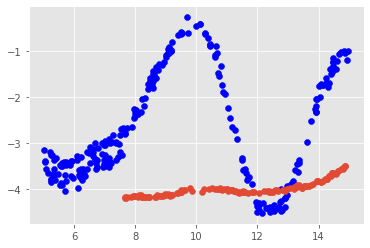

Epoch 0 batch 300 train Loss 0.7058 test Loss 0.6138 with training MSE metric 3.0927 and testing MSE metric 2.1911
learning rate is 0.0003000000142492354
r squared training, series 0: -0.6568826623087183, series 1: -1.111670557625102
r squared testing, series 0: -0.9892218251664691, series 1: -0.5539937338838512
p:  0.10689286744936077
0
[-0.014080798131765953 -0.055624331882514838 0.0019964494023227215 ... -0.011269165209560013 -0.025340085874848754 -0.0248814290062737]
p:  0.8754913087516732
1
[0.025083864155173122 0.019636895346444524 0.050810645622456983 ... -0.030724437508505592 0.0063254699786436386 0.026056137366843653]
p:  0.9800740651210103
1
[0.025085955346155594 0.019610552013802938 0.050783060816713986 ... -0.030718000041017206 0.0063343545239965991 0.026013983024353832]
p:  0.7963342049197283
1
[0.025094905376789607 0.019594695762612375 0.05077498373828776 ... -0.03072168337195437 0.0063431103357263633 0.025998807970721557]
p:  0.41642159783129973
0
[-0.014139739219433137 

p:  0.7637601629063031
1
[0.025015858562304389 0.019248988708897945 0.050440168987681271 ... -0.030672316688543831 0.0063281253873163383 0.025744905621174749]
p:  0.6662594358733149
0
[-0.014348088159225175 -0.056059005722993965 0.0019563004828945054 ... -0.011120827047781438 -0.025638678411690569 -0.024995291031912479]
p:  0.5483533854778317
1
[0.025017128712944522 0.019240353488214037 0.050409254580289227 ... -0.030674438012041692 0.00633728247452717 0.025741232270516206]
p:  0.4748213944957028
0
[-0.014382877800010895 -0.056112652029659996 0.001984252926814888 ... -0.011118456431416863 -0.025679217875216983 -0.024982488225032337]
p:  0.7198865669089417
0
[-0.014393551684223831 -0.056118205476185908 0.0019837238237378619 ... -0.01111779829173656 -0.025688001035340836 -0.02498369583372494]
p:  0.877129143655009
0
[-0.014403175901503416 -0.056123212798243262 0.0019832467525162821 ... -0.01111720487333866 -0.025695920461831997 -0.02498478468649758]
p:  0.8656922833506228
1
[0.0250197690

p:  0.08404017322690005
0
[-0.014366384777751656 -0.056042131751579627 0.0019803839329775377 ... -0.011144658533641414 -0.02567760710469005 -0.024983073624310317]
p:  0.30974701697341744
0
[-0.014304452828356686 -0.055961641016534822 0.0019538672793599442 ... -0.01115968768233723 -0.025621299656914644 -0.024978336597232285]
p:  0.09657759363510843
1
[0.025137834515404172 0.019544683829880484 0.051308559723412056 ... -0.030851449444546378 0.0063482089618000417 0.026298831729760573]
p:  0.9974677752347462
0
[-0.014182859613459992 -0.055800267092747623 0.0018983752697221841 ... -0.011198929729068982 -0.02551264291526702 -0.024949917993250248]
p:  0.6461657454099072
0
[-0.014122268969449684 -0.055711417224915287 0.0018687715318088099 ... -0.011226455492031955 -0.025460864738822638 -0.024929668786572955]
p:  0.8784020263983129
1
[0.025165987626334742 0.019686846522470939 0.051492159463924714 ... -0.030893632820642267 0.0063507372144830021 0.026452461344032046]
p:  0.04648617172018965
0
[-0.

p:  0.5403840579704057
0
[-0.013867823923688329 -0.055342907235077732 0.0016632957983832681 ... -0.011327261197733949 -0.025275182720439226 -0.024896432670141438]
p:  0.24371029377064501
1
[0.025026054363609544 0.019710068915213878 0.051416547723311494 ... -0.030846296408364143 0.0062996750966525916 0.026531094327484291]
p:  0.6404463089193572
0
[-0.013815853814943071 -0.055291977486853904 0.0016511209718647636 ... -0.011344127094684353 -0.025247202050951746 -0.024888844533454947]
p:  0.042135284214034785
0
[-0.013794130692725294 -0.055267441907684407 0.0016529876185861314 ... -0.011357522183274765 -0.025236942360199733 -0.024876646261505438]
p:  0.2821114155758345
1
[0.024964849433273678 0.01959218440853323 0.051332347689677267 ... -0.030800501711567858 0.0062934746782786714 0.026410054265007289]
p:  0.6393029931741695
0
[-0.013725751510187059 -0.055237623044590685 0.0016498293226850933 ... -0.011353095023939982 -0.025188319202455782 -0.0248909481866752]
p:  0.31356001735404215
1
[0.0

p:  0.012552568984737222
1
[0.024725011335694939 0.019088362496680097 0.050962339898277184 ... -0.03064847416456801 0.0062208024172462281 0.026001721737382598]
p:  0.08088720676137029
1
[0.0246899267708474 0.019015621871969948 0.050904507013809254 ... -0.030626965762243923 0.0062074430977066847 0.025944080826885128]
p:  0.1412877183147676
0
[-0.013819838066486956 -0.055518345014145425 0.0018887580595066233 ... -0.01127290871767044 -0.025412073173993042 -0.024966371260888881]
p:  0.5370253159953312
0
[-0.013844936612963927 -0.055587753163486166 0.00192572121850987 ... -0.011249031151844318 -0.025449380374149923 -0.024984049966657429]
p:  0.6801584105255598
1
[0.024606837011285205 0.018860422569047637 0.050739512160469735 ... -0.030573206862058812 0.0061887582169008488 0.025810084442016643]
p:  0.49358100271400374
0
[-0.013887961905862785 -0.055706736386126408 0.0019890854752938614 ... -0.011208098930513232 -0.025513334404913175 -0.025014355765108843]
p:  0.6996882462704724
0
[-0.0138825

p:  0.39171111972684736
0
[-0.013859727056828587 -0.055814578120275155 0.0021080701775090934 ... -0.011163345420709424 -0.025468635776878027 -0.025038944191268876]
p:  0.6424065777004084
0
[-0.013883209570787066 -0.055851923573001179 0.002112855059046969 ... -0.0111503507702338 -0.025481577371622054 -0.025042274023461507]
p:  0.8945995081600718
1
[0.024827163996177109 0.019347928114663564 0.050778695013433163 ... -0.030658073446208509 0.006303470986476648 0.025918501458730279]
p:  0.8834131994504818
0
[-0.013923462266753367 -0.055915939510611884 0.0021210570932187873 ... -0.01112807591015303 -0.025503761285972967 -0.025047981875806556]
p:  0.42170384756761903
0
[-0.013940665682759409 -0.0559432989898939 0.0021245625231702267 ... -0.0111185559594089 -0.025513242367871822 -0.025050421328758808]
p:  0.7726761689462999
1
[0.024978349176452575 0.01970759543738887 0.050843177175967966 ... -0.030730427783342722 0.0063556264559159583 0.0260650662199783]
p:  0.5594898695997457
1
[0.025023973481

p:  0.5325120156823984
1
[0.025185935891684212 0.020405087579486857 0.051103574364224379 ... -0.030872779779935522 0.0064586346951300555 0.026514992564332034]
p:  0.38546075631557686
1
[0.025182814216795815 0.020404865758813121 0.051125419891872588 ... -0.030874032095934242 0.006461559428784177 0.026527538098710408]
p:  0.7048762169258705
1
[0.025180000198444574 0.020404665799667737 0.051145112434213755 ... -0.030875160989988604 0.0064641959154498668 0.026538847208499312]
p:  0.8367354053029287
0
[-0.014175828518668011 -0.056359590303357424 0.0016599133001583674 ... -0.010692637962327684 -0.02560591294304683 -0.025551923820686349]
p:  0.445933685274997
1
[0.02518077565733234 0.020399960861570872 0.051216240443397426 ... -0.030876788352139976 0.0064748660529321232 0.026562417886975945]
p:  0.8360544153764603
1
[0.025182115660734677 0.020400878118548228 0.051258173321395706 ... -0.03087739130409534 0.006482369534044556 0.026578328356439591]
p:  0.5219738835524339
0
[-0.014163699480018707

p:  0.92568684590445
0
[-0.014100102133607007 -0.056293666497239228 0.0017226787122335619 ... -0.010745491397406076 -0.025521723397470941 -0.025488745176124566]
p:  0.2795396681085437
0
[-0.014113923767610052 -0.056323055657219213 0.0017764104226588261 ... -0.01076072850291169 -0.025556306158441337 -0.0254590753964331]
p:  0.18282547296019724
1
[0.025109730537210259 0.020124179022959109 0.051456863832019785 ... -0.030856842265429858 0.0064614909770843295 0.026583853726213448]
p:  0.2674925455194437
1
[0.025097173381416055 0.020085442540952972 0.051451430546774993 ... -0.030849839790420965 0.0064523583600149433 0.026567594261519296]
p:  0.17218325619419794
0
[-0.014250943067355634 -0.056476504928402192 0.0018568381398712892 ... -0.01079187706580698 -0.02583083672933844 -0.025421163769231796]
p:  0.7473349092680945
1
[0.025075651360590909 0.020019051124077637 0.051442118304583069 ... -0.030837838074693518 0.0064367057409434551 0.0265397267615417]
p:  0.24651559387119937
1
[0.025048853070

p:  0.5470103746923191
1
[0.024820418511010904 0.019478112079062079 0.051325558624134973 ... -0.030678436753240161 0.0063302579809811172 0.026223821117902033]
p:  0.15369672182538152
1
[0.024809910078921839 0.019480827060314749 0.051347305775114267 ... -0.030670749013505177 0.0063419227905986732 0.0262233384273104]
p:  0.4225726133719603
1
[0.0248004380611254 0.019483274271314379 0.051366908071322166 ... -0.030663819491825336 0.0063524371360241154 0.0262229033430043]
p:  0.31521341007099724
0
[-0.013987168768875834 -0.055975915383903653 0.0017023235665524982 ... -0.011171170756788489 -0.02595972754296411 -0.025134379939164939]
p:  0.93747949002021
0
[-0.01388944175572219 -0.055849776037011495 0.0016471809293558829 ... -0.011209466556162439 -0.025889987463789888 -0.025123459035679432]
p:  0.2865535693601049
1
[0.024783260785222794 0.019515166208902462 0.051417593914932308 ... -0.030649075932151885 0.0063853489284106208 0.026238470126790928]
p:  0.38959366680783014
1
[0.02478241008914655

p:  0.15056179394076796
1
[0.024812508381711416 0.019686310563965286 0.051689139602544329 ... -0.030676593805478689 0.0063982262866821953 0.026383973884892022]
p:  0.13938476568508396
1
[0.024826408300765098 0.01972353904463708 0.051782976524076485 ... -0.0306914701237558 0.006386871436332325 0.02642760223461444]
p:  0.05615613686814791
1
[0.024838936858014141 0.019757094574490167 0.051867555522319954 ... -0.030704878749050285 0.00637663685202597 0.026466926224649502]
p:  0.4612103171055011
1
[0.024850229318477222 0.019787339437048052 0.05194378975768256 ... -0.0307169644480518 0.0063674120357168984 0.026502370417851542]
p:  0.48615834513284406
0
[-0.013352803701212218 -0.055052108657877817 0.0012516282052865175 ... -0.011433016874302858 -0.025555861430295129 -0.02506127975901068]
p:  0.5620899593480687
1
[0.024869581631469077 0.019839171191842191 0.052074435223463868 ... -0.030737676163843503 0.0063516031219317606 0.026563112461183123]
p:  0.6831477188755736
0
[-0.013436630448277179 -

p:  0.4217440074735175
0
[-0.013327901728021944 -0.055114819571081559 0.0012143423069192183 ... -0.011380756758385549 -0.025337401737132254 -0.024928478425486948]
p:  0.35542646180494697
1
[0.02485229905346259 0.019838954937790917 0.05217504615205313 ... -0.03069820333686938 0.00633064901741731 0.026428118976585532]
p:  0.05877361536483838
1
[0.024850466097127197 0.019838104267500014 0.052180251925111776 ... -0.030694443532195144 0.0063292692063812951 0.026415757500103148]
p:  0.23388240475404554
0
[-0.013372008722206077 -0.055426234659402447 0.0012128317447568243 ... -0.01119223548567584 -0.025301260765881104 -0.025070439383542614]
p:  0.12625370967419824
1
[0.024847325035259507 0.019836646508829606 0.052189172844086827 ... -0.030688000509543414 0.0063269046809532872 0.026394574146314225]
p:  0.3018230262139321
0
[-0.013568520709471843 -0.055805122148644512 0.0013255676585733111 ... -0.011078510694715188 -0.025508232903541934 -0.025164217688982971]
p:  0.4277576019240711
0
[-0.0137360

p:  0.548581334922668
1
[0.024850838436198171 0.0197913476454388 0.051835969235497645 ... -0.03062227498910311 0.006376058120792877 0.026133749802808446]
p:  0.7978164033226625
1
[0.024888343292610787 0.019838135064602018 0.051787584570557071 ... -0.030623513307354255 0.006400702724792779 0.026099932850187007]
p:  0.9859972744982632
0
[-0.014519731259336791 -0.057454028975658843 0.0018962865662970768 ... -0.010690667630600488 -0.026618432439424741 -0.025574590649334806]
p:  0.22725246357253603
1
[0.0249943468244423 0.019984514784588323 0.051773847924772687 ... -0.030645137520857055 0.0064730672595352586 0.026077723036601816]
p:  0.41447838506762547
1
[0.025048468223548871 0.020071732389444007 0.05178065736965199 ... -0.030659898303347852 0.0065103198341431787 0.026087420571858509]
p:  0.6184216695239729
0
[-0.014521945598421945 -0.057556864951118884 0.0018923938887185747 ... -0.010648763722053188 -0.026657322539584 -0.025651242589111434]
p:  0.5890756831829651
1
[0.025124379574273537 0

p:  0.5225859544585452
0
[-0.014299319353579887 -0.05737755324677811 0.0018007436248340489 ... -0.010670923068946993 -0.026449514835911129 -0.025653834229784223]
p:  0.6326462520937831
0
[-0.014272356973760324 -0.057337527144005161 0.0018116117389899615 ... -0.010684983297613582 -0.026424445848970617 -0.025629666992002056]
p:  0.13522828795692055
1
[0.025018706826561727 0.020320715490280351 0.051365424579717163 ... -0.030701825754324733 0.00654393486974753 0.026137070664767934]
p:  0.8711980419732647
0
[-0.014177162073277846 -0.057204047436411123 0.0018180885969808439 ... -0.010733360772710403 -0.02634428354782967 -0.025566401965450791]
p:  0.23926585156685642
1
[0.025008147682527324 0.020438702878898384 0.051315454693581071 ... -0.03072288430690372 0.0065417433527863991 0.026227249324654592]
p:  0.01883208395186209
1
[0.025009968218483131 0.020501283515113336 0.051301196425035715 ... -0.030734961360220563 0.0065427724372998574 0.0262701031213185]
p:  0.42001982990476927
1
[0.025011608

p:  0.7186032146844945
1
[0.025004795663474022 0.020778815850367963 0.051255985719822671 ... -0.030786625865489605 0.0065614558062945822 0.026444668258246488]
p:  0.21214838267488134
0
[-0.013619115878305357 -0.056533910919164126 0.0015336918825253844 ... -0.010871244431026579 -0.026160814084353515 -0.02561056591849125]
p:  0.815742405836793
0
[-0.013552408622058006 -0.056466816002738306 0.0014783185172848223 ... -0.010871376298362198 -0.026101793163587152 -0.025622710195442766]
p:  0.5241447720288471
1
[0.025074022343405274 0.020921678845317898 0.05151563186504849 ... -0.030849647164631778 0.0065877529782517813 0.026599088367681083]
p:  0.9007967654069069
0
[-0.013438110524211202 -0.056351853677258749 0.0013834402285612729 ... -0.010871602243580214 -0.026000665050132592 -0.025643518542648194]
p:  0.17076694841707551
0
[-0.013389282512514806 -0.056302741908426386 0.0013429083362667929 ... -0.010871698767108605 -0.025957463240123737 -0.025652407843828124]
p:  0.830735003284936
0
[-0.013

p:  0.6066724945513091
1
[0.024641134782033093 0.02013302654626193 0.05120891126964601 ... -0.0306664169480296 0.0063368911437650631 0.026180722367709696]
p:  0.009014851978330518
0
[-0.013187473082081676 -0.055944764229027853 0.0012134555816522496 ... -0.011034313847479185 -0.025690582536411415 -0.025431805442684748]
p:  0.023507350206915523
1
[0.024524299287757765 0.019928908312317025 0.051029746485288754 ... -0.030600313231182029 0.0062698687552480642 0.026022566960017837]
p:  0.9045002332322177
1
[0.02447438903202304 0.019841712265931823 0.050953210154386731 ... -0.030572074779663835 0.0062412378618847356 0.02595500549745652]
p:  0.10804535953496497
1
[0.024434160274127169 0.019794126329630537 0.050903896569086275 ... -0.030553062369167289 0.006216839501730906 0.025921037936606071]
p:  0.5669256955700671
1
[0.024397906281600903 0.019751242078149139 0.050859455367663939 ... -0.030535928462282928 0.0061948517989633715 0.025890426509245269]
p:  0.6130879295109121
0
[-0.013083519478912

p:  0.5160430538116689
0
[-0.013071094507637767 -0.055531959118581831 0.0014829489997952527 ... -0.011488375937571089 -0.025540644485175863 -0.024847625219138705]
p:  0.8107020439427888
0
[-0.013068166896050745 -0.055540247386426808 0.001486124328175383 ... -0.011487565470473872 -0.025542296077155698 -0.024848379133350518]
p:  0.24173975165494654
1
[0.024323812747500725 0.01953910700282115 0.050735038911845262 ... -0.030480206417160486 0.0061017641744494982 0.025638332423779223]
p:  0.3281897956433394
1
[0.02436008520598951 0.019566005538997039 0.050782547927295626 ... -0.030493496039696696 0.006126098563356855 0.02565270883364652]
p:  0.2702053479071139
1
[0.02439277302548773 0.019590245817368835 0.050825361846419191 ... -0.030505472310486174 0.00614802809748613 0.02566566448957654]
p:  0.7539892462914742
0
[-0.01298653304249333 -0.05551021008411406 0.0014612672528663251 ... -0.011489291023293284 -0.025362387868227348 -0.024813286952183922]
p:  0.4779994410384164
0
[-0.012956592949691

p:  0.7024203809227545
1
[0.024468658023655953 0.019802802665695864 0.051011351942491769 ... -0.030546860630609178 0.0062642301567237772 0.025829671946063459]
p:  0.9937847496080356
1
[0.024438181212785459 0.019774537018213661 0.051018891591924909 ... -0.030528317968899443 0.0062669556352307554 0.025807035374244579]
p:  0.18407726259307167
0
[-0.013737422153861818 -0.056426627965534007 0.0015382880412867425 ... -0.01112319847803934 -0.026047685208818526 -0.025257322194977578]
p:  0.045759262390256294
1
[0.024402413365476688 0.0197278099473743 0.051119359589103332 ... -0.030502935587639148 0.0062899717966536676 0.025806712427697637]
p:  0.184202870028502
0
[-0.013709319985225331 -0.056428864737432256 0.0015384763137415783 ... -0.011117814230449484 -0.026022263999663103 -0.025262134340639075]
p:  0.2794454493074061
1
[0.024373367157448294 0.019689864018016763 0.051200947229991911 ... -0.0304823231664295 0.0063086626676464126 0.025806450170577411]
p:  0.40923271918565607
1
[0.024360960154

p:  0.04445063415925765
1
[0.024300943366900619 0.019665464017506053 0.051224862976066772 ... -0.030414099514163861 0.0062797656982417132 0.025777029635486552]
p:  0.9209094525378024
1
[0.024309145876135373 0.019702031770842381 0.051219636609578879 ... -0.030411916620273691 0.00627266531705869 0.025790206470818752]
p:  0.46208131362256244
1
[0.024364545309389737 0.019855909104313098 0.051265125517126323 ... -0.030435168108249661 0.0062939902730303693 0.025886089962284493]
p:  0.6519556020005939
1
[0.024414467576303073 0.019994573073033428 0.051306117080142009 ... -0.030456120795435675 0.0063132068983092465 0.02597249375713968]
p:  0.5638470670745533
1
[0.024462661620204881 0.020123421936009123 0.051368880876696471 ... -0.030478316976342869 0.006335612932265801 0.02606568494829373]
p:  0.3269723135192336
0
[-0.013459594586130504 -0.05642872967500303 0.0016165737769982189 ... -0.011117690305225327 -0.025971395469946465 -0.025346650996754951]
p:  0.4111943206284464
1
[0.024495822962222333

p:  0.4017972644758495
0
[-0.01290077665495825 -0.055676870387482022 0.0013729096028196931 ... -0.011415422799962174 -0.025372594092676004 -0.025051541987842388]
p:  0.1780186308306948
0
[-0.012863111166403944 -0.055613454280795178 0.0013449278862761684 ... -0.011457043653522139 -0.025324597180578584 -0.025010647692502653]
p:  0.1373894748079888
1
[0.024486712412285859 0.020362685772626198 0.05138245913841883 ... -0.030454512881890553 0.0063434864547206177 0.026150352166759129]
p:  0.06444579219191326
0
[-0.012730184615003005 -0.055419987355041923 0.0012721711431460012 ... -0.011547328554592383 -0.025146142473510415 -0.024905089983827886]
p:  0.9080536481043221
1
[0.024477016585541141 0.020360563103991917 0.051378839108018992 ... -0.030445549188948168 0.0063406907560682509 0.026139478249651793]
p:  0.31152175305589314
1
[0.024457995226582176 0.020332328293779092 0.051335331757349945 ... -0.030431915115559063 0.0063287565798687819 0.02610807360118262]
p:  0.9147953100478505
1
[0.0244408

p:  0.3111393683920305
1
[0.024395112378506778 0.02029769226598279 0.051070493043186407 ... -0.030383226644130172 0.006290196991412084 0.02602951068522889]
p:  0.39363959267030946
0
[-0.012798853021259642 -0.055324315319135509 0.0011645322372567457 ... -0.011640311011899079 -0.025167732034671545 -0.024904755739553752]
p:  0.49222593519566527
0
[-0.01288404478937139 -0.055445003121953065 0.0012172144633722805 ... -0.01161247000455321 -0.025300492498179502 -0.024938971176766172]
p:  0.28088175067331145
0
[-0.012972349108555364 -0.055580462715714408 0.0012762173107228121 ... -0.011574723129088535 -0.025429014257784328 -0.024987586582756422]
p:  0.4203307739498082
0
[-0.012972587070703393 -0.055602482656270526 0.0013097370150879383 ... -0.011593782394389712 -0.0254711219914614 -0.024983483097120836]
p:  0.07843589213562241
0
[-0.012931283129821829 -0.055591101792343882 0.0013566519109465534 ... -0.011627195036693435 -0.025472559616971705 -0.024965913842420914]
p:  0.7118237016314616
1
[0.0

p:  0.5362000838828749
1
[0.024375879081883718 0.020269486310241166 0.050750003904935753 ... -0.030319405037669386 0.0063518114479748245 0.025945709688411856]
p:  0.20724111339917373
0
[-0.012590193355121491 -0.055330792748963895 0.0015567625386098776 ... -0.011922569454003109 -0.0253878931513152 -0.024734600082567913]
p:  0.8841439076249757
0
[-0.012597149563068432 -0.055323491732894248 0.0015312590743568348 ... -0.01190870758133244 -0.025398049477994802 -0.024747489670483888]
p:  0.34800534793447857
1
[0.024368643467701893 0.020315426237527745 0.050843464739610017 ... -0.030320131083748477 0.0063029217107300689 0.026053643478425745]
p:  0.6486795279386139
1
[0.024362996432820902 0.020317092015156638 0.050844273025270427 ... -0.030314924198692049 0.0062829592231016087 0.026065878811279034]
p:  0.6673864738119374
0
[-0.012632602192529761 -0.055302917908142235 0.0014344509657402344 ... -0.011855793148682703 -0.02542671204086756 -0.024792547903505473]
p:  0.24430842645894024
0
[-0.012645

p:  0.3956628948902887
1
[0.024271827641494638 0.020134009253666967 0.051229916819610317 ... -0.030260668679658615 0.0061908213947480112 0.026165629831084065]
p:  0.24255669539266478
0
[-0.012443059035686131 -0.054645602955130643 0.001173447318257876 ... -0.012112589813685388 -0.025096909744875516 -0.024556206638859771]
p:  0.5694479241654126
0
[-0.012436504518451444 -0.0545420438368784 0.0010964953244043168 ... -0.01213927009110248 -0.025092492361512366 -0.024542076387796284]
p:  0.08875275957473161
1
[0.024222333725734305 0.020017780229873685 0.051272325092245261 ... -0.030218305264587918 0.00618052719666057 0.02612844171896175]
p:  0.8634595750367373
1
[0.024212438923954333 0.019990108130995398 0.05127251521412976 ... -0.030205588042561748 0.0061843114452590376 0.026114131055664288]
p:  0.2871071545997329
1
[0.0242169906422598 0.019967613204029334 0.051303393600906154 ... -0.030197349189837772 0.0061993613510124088 0.026100821717618464]
p:  0.09990847912880474
0
[-0.0125263052160971

p:  0.191629006587411
0
[-0.012587962466171559 -0.054888685302649225 0.00091233247056123838 ... -0.011797333591577646 -0.025560399728209157 -0.025098443012321003]
p:  0.40630644920739933
0
[-0.012616420025641293 -0.054982601160306829 0.00093721990800181988 ... -0.011748228549010637 -0.025609374858566045 -0.025164062644705162]
p:  0.9839919981354943
1
[0.024208344114243729 0.019811250225306269 0.051410255369197723 ... -0.030130952300751329 0.0062854823775612594 0.025995667982966649]
p:  0.2738482197055788
0
[-0.01269151406338879 -0.055128124678241637 0.00099915718219982367 ... -0.011686946869705721 -0.025749529812969491 -0.02523199591170577]
p:  0.04359838439266661
1
[0.024166095092349266 0.019759208711055697 0.051295963448154146 ... -0.030116355025000287 0.006256415633922029 0.025961266489369875]
p:  0.8417342841261122
1
[0.024148051925903604 0.01973698349363294 0.051247153131867472 ... -0.0301101210090046 0.006244002184467118 0.025946574743863388]
p:  0.13204376363785686
1
[0.02414502

p:  0.29243320171404497
1
[0.024251126650799915 0.019856029745880431 0.051131627290535574 ... -0.030161684482105308 0.0062570285314606493 0.025917579737834137]
p:  0.24458899242562482
0
[-0.012529350881361465 -0.054949397212633914 0.0012315423290302629 ... -0.011920932498854854 -0.025769594568210766 -0.024965688561431946]
p:  0.7414408070104644
1
[0.024298534763853661 0.01993782278464791 0.051101677541577566 ... -0.030165225497565742 0.0062984386168388629 0.025903207601654529]
p:  0.6166902969145475
0
[-0.012495377433605926 -0.054816628637114728 0.0011976503063647404 ... -0.012033162733415283 -0.025754118827549528 -0.024891652476575633]
p:  0.25674295690390725
1
[0.024367932770519702 0.020117897795639595 0.051128265240718708 ... -0.030194361908045274 0.006341500766153506 0.025986455594546841]
p:  0.9383595375521394
1
[0.024386971248187568 0.020180168266831007 0.051114355842449485 ... -0.030202584073162442 0.0063546369754320384 0.026009311006871722]
p:  0.09586800328116007
1
[0.02438199

p:  0.13722103853211254
1
[0.024184173515346304 0.020002158385998382 0.050678159081558725 ... -0.030099694809208998 0.0062633737913337017 0.025692029729732866]
p:  0.2204514135385306
0
[-0.012117548937863591 -0.054297773842607894 0.0012845882015479039 ... -0.012618732343654184 -0.025555848952135116 -0.024518011058782607]
p:  0.827723890734152
0
[-0.012101846091662465 -0.054274985999334925 0.0012940933248541985 ... -0.012657016299846724 -0.025545169190152813 -0.024496506442813707]
p:  0.19997200818860428
0
[-0.012087697674217366 -0.054254453930490741 0.0013026575335678102 ... -0.012691510517295855 -0.025535546620530886 -0.024477130574340707]
p:  0.018743879998638135
1
[0.024002433983983103 0.019787889542591378 0.050460438330616149 ... -0.030039045524771744 0.0061407330991641793 0.025504473751832644]
p:  0.6055320678592475
0
[-0.012008697234885186 -0.05412512696818722 0.0012937395266944816 ... -0.012797631608967954 -0.02544380713118281 -0.024393295567405326]
p:  0.37036247842002923
0
[-0

p:  0.3066887301383402
1
[0.02396787571829995 0.019977749621922024 0.050556975881839758 ... -0.030072583135451556 0.0061008380158590406 0.025640007047677452]
p:  0.967710238064459
1
[0.023988461730523037 0.020045679546713827 0.050616558525148819 ... -0.030088516467074843 0.0061029522497562626 0.025702165094646168]


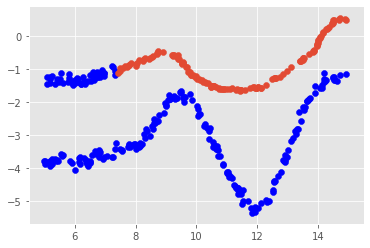

Epoch 0 batch 600 train Loss 0.5708 test Loss 0.5270 with training MSE metric 1.8478 and testing MSE metric 1.5560
learning rate is 0.0003000000142492354
r squared training, series 0: -0.15873941795083782, series 1: -0.2968455382673159
r squared testing, series 0: -0.18629150188360355, series 1: -0.1661273179545249
p:  0.2313510658343274
0
[-0.011809622798391924 -0.053751368255501843 0.0012053387056341839 ... -0.013075918326596707 -0.025167517105133791 -0.024101338127931426]
p:  0.35096823793869525
0
[-0.01186412364153059 -0.053792186182191962 0.0011582904827528852 ... -0.0130293448733129 -0.025186943415561651 -0.024139416308948877]
p:  0.3359882304934785
1
[0.024023721231230314 0.020162029191861119 0.050718611035352489 ... -0.030115806906632261 0.0061065734869038494 0.025808628730576235]
p:  0.8448169947385974
0
[-0.0119988652169751 -0.05390486530783465 0.0011199685777393766 ... -0.012944886533807837 -0.02525914325614502 -0.02420064127074234]
p:  0.18076971552126686
1
[0.0240403604486

p:  0.6836180864796051
0
[-0.011913842565587522 -0.053741177856086966 0.0011962434644428649 ... -0.013172683766373105 -0.025128985938986697 -0.024011150763006542]
p:  0.6334995764466392
1
[0.023876451974300949 0.020183790195801368 0.050656420638027021 ... -0.030075272741437654 0.0061288380413166465 0.0258103796458917]
p:  0.2516335567006043
1
[0.023822912033869017 0.020135356946002783 0.050541167697877636 ... -0.030060380921768055 0.0061089369731176877 0.025765186273764989]
p:  0.43883101328962726
1
[0.023774673573670847 0.020091719516364848 0.050437327008751504 ... -0.030046963677582316 0.0060910064919923136 0.0257244679115204]
p:  0.5817175744327816
1
[0.023731211701233206 0.020052403079125373 0.050343768658822827 ... -0.030034875013139818 0.0060748514927572777 0.025687781494421736]
p:  0.6720014352300951
0
[-0.011951650050817461 -0.053728989018472013 0.0011780841519665095 ... -0.013160406988080324 -0.025198380473809297 -0.023993556556197025]
p:  0.5775451181964326
1
[0.0237488057208

p:  0.27552398642238796
0
[-0.01191012635619886 -0.05368471288836104 0.0013553765683412616 ... -0.013220911236449027 -0.02524788438928105 -0.023804066780639153]
p:  0.20711353141577937
1
[0.02406121757819293 0.02060584377376978 0.05116118615751452 ... -0.030226430558941086 0.0064260473801320455 0.026318118258567173]
p:  0.17030394098894908
0
[-0.012136846765054169 -0.053985171499097775 0.0014083541420587 ... -0.013012621851117009 -0.025535773721757974 -0.023950425841974592]
p:  0.765271337876994
0
[-0.012159267417727352 -0.054028764205036071 0.0013971557538833908 ... -0.012970139950109183 -0.025603812819753269 -0.02397657436675819]
p:  0.7973624442014502
1
[0.02411222282931063 0.020697752033108044 0.051281456678819309 ... -0.030247429264304928 0.0065062015350033234 0.026408106929232549]
p:  0.5385999743150434
1
[0.024074304980215424 0.020638576548286512 0.05123302142531027 ... -0.0302232246448152 0.0065018450016426669 0.026357434109103191]
p:  0.8472851580784018
0
[-0.01221406467237738

p:  0.0317033382156231
1
[0.023779951204221147 0.020080566768770482 0.051319998372440126 ... -0.030049609690122291 0.0065323383775360176 0.026083009956397098]
p:  0.9434337627907454
0
[-0.012021706388145531 -0.054027894006960564 0.0014273930010544431 ... -0.012929988511813911 -0.025826751654768956 -0.023916523708784856]
p:  0.3998583661733428
1
[0.023671578648718675 0.01989564138294455 0.05132029197187607 ... -0.030003292672685918 0.00650887034927304 0.026007413349314907]
p:  0.27864142107776146
1
[0.023609874175179669 0.019792377482504384 0.051285775265381008 ... -0.029976598741892378 0.0064826967887985209 0.025958795254036972]
p:  0.9395049831786095
1
[0.023554281338658514 0.019699341551966447 0.05125467733205101 ... -0.029952548762143854 0.0064591156383093321 0.025914992630399262]
p:  0.30232515969331464
0
[-0.011673763593766796 -0.053709184337890924 0.00141450187394212 ... -0.013116315490302734 -0.025837420776301804 -0.023782713596207407]
p:  0.7654945079949459
1
[0.023452307506112

p:  0.13360725511869742
1
[0.023487752041359111 0.019649123790505613 0.051423745096999041 ... -0.029923003332095955 0.0064839755923630652 0.026164855311984946]
p:  0.44734397141856064
1
[0.023503696846446969 0.01968445328238326 0.051468941736504112 ... -0.029920144720114283 0.0065188521255557241 0.026200437260184783]
p:  0.24814411001028014
0
[-0.010917332117706733 -0.05282693966242779 0.0011678879863788875 ... -0.013613562198209134 -0.025495544570415425 -0.023425324196825061]
p:  0.35020842831821075
0
[-0.010939912653020273 -0.052886664697466605 0.0011236235494988525 ... -0.013545175988753986 -0.025544978584978392 -0.023532984299997148]
p:  0.8479276107036668
1
[0.023542664830057788 0.019770796078265172 0.051579399146806995 ... -0.029913158473155912 0.0066040879236895994 0.026287397042721216]
p:  0.6081007459136918
1
[0.023521990326588884 0.019747198147409353 0.051536023237550604 ... -0.029890219491870859 0.0066045566892881822 0.026249804226832485]
p:  0.2980893191591636
1
[0.02350257

p:  0.5023127095537522
1
[0.02352540909593092 0.019476621254102586 0.051681367059506725 ... -0.029782469549486389 0.0066889463965959049 0.025986559221300231]
p:  0.18145498512808722
1
[0.023573077442378347 0.019527094165575548 0.051805395879975687 ... -0.029795195166003111 0.0067194541745186093 0.026045132555227505]
p:  0.8670995440033593
0
[-0.010980903324195716 -0.053044936995332727 0.00089097956525392014 ... -0.013333965398851224 -0.025536291230341 -0.023922574717911604]
p:  0.5114301571713139
1
[0.023658084994804696 0.01964390224462426 0.051975739991668178 ... -0.029817110826345618 0.0067646180124451005 0.026159013460569449]
p:  0.8090381190951365
0
[-0.010964873183981927 -0.052968774464344143 0.00099582956712231259 ... -0.013436974676412411 -0.02545775762346749 -0.023803317615076564]
p:  0.2911024560112827
1
[0.023733843517067796 0.019798325976564616 0.05186338190418887 ... -0.029794063418423042 0.0067545919303518909 0.026204260436504773]
p:  0.28964172295369084
0
[-0.011065827014

p:  0.6623947954488126
1
[0.023809361529913583 0.020023381432629425 0.051535124861939265 ... -0.029686289495990854 0.0067820790123046971 0.026133980094715396]
p:  0.6468440598068069
0
[-0.011217985739672488 -0.05303980559555619 0.00093841172734411191 ... -0.013314749894418587 -0.025541116239730721 -0.023898675186390703]
p:  0.3274902396804107
0
[-0.011207558701907613 -0.053008135171002363 0.00090296135144689413 ... -0.013334812160197329 -0.0255080644933021 -0.023883404667421875]
p:  0.4609514098241704
0
[-0.011224881691805993 -0.053019591742727738 0.00087288248573345482 ... -0.013324703628695042 -0.025511416425261734 -0.023881521933511778]
p:  0.6244065797348467
0
[-0.011237611647421429 -0.053029072920318623 0.00081673883416692294 ... -0.01330747847129833 -0.025502045344156375 -0.023891494978409231]
p:  0.6536718325411625
1
[0.023745220298693272 0.019996754012701297 0.051547597969742162 ... -0.029615381228577788 0.006915128010215466 0.026026624319667346]
p:  0.44620261035955466
0
[-0.0

p:  0.01053391578596019
1
[0.023536562637162285 0.019673448806803787 0.051295960362639462 ... -0.029490231565680546 0.0071128795107880966 0.0255880560090263]
p:  0.6372230021003562
0
[-0.011376238467126005 -0.053302728831166719 0.0004532220598916366 ... -0.013019173193439605 -0.025688484431265455 -0.024188313772805586]
p:  0.5866074314517705
1
[0.023418239630190053 0.019554593114512669 0.051106125441690624 ... -0.029439412735455597 0.0071031944975257525 0.025449097589995761]
p:  0.8005529860448286
0
[-0.011391204904610777 -0.053366894797744979 0.00042676513977728654 ... -0.012948112528754724 -0.025789629785279287 -0.02426389360086624]
p:  0.66486812930686
0
[-0.011397595138464606 -0.053394291800718585 0.00041546880381079923 ... -0.012917771690273864 -0.025832815912023768 -0.024296163990789994]
p:  0.4239818904602989
1
[0.023184252777905756 0.019339210584376577 0.050861514358047054 ... -0.02935365692987774 0.0070609310817279277 0.025256358218091052]
p:  0.752820783754237
1
[0.0231164211

p:  0.7463884019215024
1
[0.023267835048635156 0.019698621583477519 0.051122489103996249 ... -0.029414488239375217 0.0072282703980499447 0.025704099420600472]
p:  0.43394898336335186
1
[0.02329826160361128 0.019767066988156713 0.051186330493708236 ... -0.029424550681326534 0.0072463098013182811 0.025776729723811932]
p:  0.16721971775162692
0
[-0.011155747511670148 -0.053285569053101355 0.0005568745230578446 ... -0.013028450258616325 -0.02597104153430797 -0.024202026785373493]
p:  0.8700910313298001
0
[-0.011194834964428784 -0.0533669106537211 0.00063193604254529036 ... -0.013009884461927496 -0.026048574452841547 -0.024220507577040265]
p:  0.14947220291903351
1
[0.023322219301364938 0.019869466662540303 0.051323766146527665 ... -0.029436437309728253 0.0072656905032067549 0.025915421544161116]
p:  0.05739266150133182
1
[0.023296860845836397 0.019856120991281732 0.051349087209221413 ... -0.02943162166135966 0.0072553194399680226 0.025928314826420006]
p:  0.7634260134931856
1
[0.0232740155

p:  0.8728499065137728
0
[-0.01097121822798611 -0.053206178089680541 0.00074444928979187138 ... -0.013333107749472477 -0.026153215851869038 -0.024125710847823948]
p:  0.2545899395879163
0
[-0.010903710457017289 -0.0531126987290566 0.00071114504994363944 ... -0.01339485992276376 -0.026116045702424023 -0.024080355309817596]
p:  0.975745075116743
1
[0.022723305184087945 0.018980947318806181 0.050519198492173109 ... -0.029183785142205872 0.0068287772139381513 0.025313661999031269]
p:  0.4400475827265301
1
[0.022727715679749651 0.01903503699107131 0.05052768335125405 ... -0.029200220119626166 0.0068492496051595136 0.025364482786261536]
p:  0.5879843687571301
0
[-0.010626124716210274 -0.052759331355683559 0.00061911566025669486 ... -0.013637189749765872 -0.02597343246822938 -0.023933777826520675]
p:  0.897152151483696
0
[-0.010580276489338897 -0.052698558774732757 0.00057674937919104162 ... -0.013660201460849883 -0.025958100322121393 -0.023943603475641062]
p:  0.03774078506192646
1
[0.022814

p:  0.3723990380734924
0
[-0.010226137533199823 -0.052318583245896805 0.00026742815690990808 ... -0.013813940568254966 -0.02579398573993992 -0.023995824760328154]
p:  0.19130618019838885
1
[0.022905996434364161 0.019226496645367155 0.050495756045068549 ... -0.029273575385139996 0.0071674517465117119 0.025530884194153867]
p:  0.4918753406798283
1
[0.022884954717562793 0.0191743456688618 0.05042802939002218 ... -0.0292540702565187 0.0071643370022429955 0.025482378502855445]
p:  0.07214948340396099
0
[-0.010195457690651229 -0.052230326898894341 0.00014950621594715427 ... -0.013882043985641317 -0.025732547748796668 -0.02398091556956997]
p:  0.9954258214106372
1
[0.022848921815904998 0.019085039695501144 0.050312050836708554 ... -0.029220668686025016 0.0071590031563478606 0.025399314899722688]
p:  0.29665824896034565
1
[0.022813981491570427 0.019012267897888867 0.050227993523538669 ... -0.029197580025264531 0.0071483085124925266 0.025325716616332376]
p:  0.9620401820351081
0
[-0.01010672640

p:  0.648874433660728
0
[-0.00988928661715526 -0.051510505703418738 -0.00010825631923074464 ... -0.014475381519934747 -0.025549768414753461 -0.023580506637419202]
p:  0.9843403791759248
1
[0.022629355319988234 0.018596933434644868 0.049911058979399438 ... -0.029040229644420504 0.0070558143492008354 0.024897264102952222]
p:  0.1403291736829574
0
[-0.0097821121869508722 -0.051312978637231325 -0.0001731029421710759 ... -0.014616410792279346 -0.025478456573107416 -0.023475160476110681]
p:  0.801138416509454
1
[0.022519585197712026 0.018351864248256793 0.049924820394656656 ... -0.028985581011400335 0.0070467658681256477 0.0247551583257803]
p:  0.11414988556529038
1
[0.022397768115130261 0.018152115588845323 0.049887162399474258 ... -0.028932078794995576 0.00699737396003739 0.024630178059233402]
p:  0.8307674553400439
1
[0.022288027504700419 0.017972169235715849 0.049853237671836727 ... -0.028883880580143632 0.006952878573537373 0.024517587850202433]
p:  0.9250920483825334
1
[0.0222152511280

p:  0.27094719761061103
0
[-0.0093674179198597555 -0.050755083034611383 -0.00043443490208085807 ... -0.014953746505934591 -0.02559464283000687 -0.023439780989198269]
p:  0.6518972184533143
1
[0.022198665582319196 0.017901407726754536 0.05013315708427999 ... -0.028818799403694608 0.0072348955200586748 0.02448466279551386]
p:  0.522108798259125
1
[0.022255312456601031 0.018005720615166289 0.050239792540481595 ... -0.028845656745679009 0.007303612084884838 0.024598163300177896]
p:  0.1470920442588085
0
[-0.0094030082501486041 -0.050832221388985244 -0.0005397255269245988 ... -0.014826852149105131 -0.025756121438560518 -0.023692309260637971]
p:  0.1677889011049054
0
[-0.0095275599721937262 -0.05100837750837002 -0.00058510457920800808 ... -0.014657238161689031 -0.025912919031896513 -0.023907447865663168]
p:  0.29323641874985307
1
[0.022486879585738782 0.018393853725728809 0.050563455049772381 ... -0.028941550720546872 0.0075207498996004854 0.024985332265306779]
p:  0.4100218479593595
0
[-0.0

p:  0.9473594057530298
0
[-0.0094612500138068437 -0.0510852924591162 -0.00078581491915067259 ... -0.014727713674879087 -0.026151286953112123 -0.0243537943242225]
p:  0.7479904318312508
0
[-0.0093915164463717459 -0.051029329587900574 -0.00081440947136443586 ... -0.014794375502916438 -0.026118865018145487 -0.024348514116504141]
p:  0.7165286596562948
1
[0.022511666055717264 0.018474563179306312 0.050867731343824808 ... -0.028923725137382682 0.0075918355981692337 0.025242818184786867]
p:  0.44355197754045583
1
[0.022373867699654843 0.018262922060760169 0.05071462049258782 ... -0.028840907795059212 0.0074673048838958082 0.025067981498126859]
p:  0.9983046204550283
0
[-0.0093296969833717991 -0.050964527796730164 -0.00088754489643021379 ... -0.014871868178583146 -0.02610508925943876 -0.024410113389414602]
p:  0.4950823280507073
1
[0.022111139147312626 0.0178804597903984 0.050421317736848423 ... -0.028685360266461082 0.0072483510015752504 0.024737338247499852]
p:  0.44588931446807
1
[0.021986

p:  0.5160132055680661
0
[-0.0092016454792628773 -0.050555824449799842 -0.00097779393775225 ... -0.015314717823717983 -0.025896515176712574 -0.024336326055746073]
p:  0.8528842440163464
1
[0.021985338407998271 0.017722556093949446 0.050180241012222536 ... -0.028468708032107472 0.0072216211492085727 0.024405288427059628]
p:  0.010031840241540357
0
[-0.0090495953577270135 -0.050406676463579832 -0.00096768760889229775 ... -0.015482467581469385 -0.025829537585014242 -0.0242721058398287]
p:  0.012673647462176585
1
[0.022128314665130183 0.01784267630420542 0.050309600769280295 ... -0.028501519775120811 0.0073230121931540668 0.024545102929837314]
p:  0.7712441911439863
0
[-0.0089790862827939088 -0.050392021529030384 -0.0010267293495533625 ... -0.015477200476636145 -0.025833225619040213 -0.024383889474111353]
p:  0.11989468088167532
1
[0.022259812143689033 0.017974924837050835 0.050455984764953131 ... -0.028536136443142457 0.007419369821031873 0.0247030243013598]
p:  0.6690980830575307
0
[-0.0

p:  0.23737407843917402
1
[0.022525379527335625 0.018431299003877279 0.050860255079237811 ... -0.028630370420188636 0.0077215327258472128 0.025195023897529832]
p:  0.6697726793208648
1
[0.022544169626687309 0.018475617234757682 0.050878742904363228 ... -0.028633885167403055 0.007758418453565244 0.025227283493228211]
p:  0.2820599072089257
0
[-0.0086895650995515127 -0.050124755529300513 -0.0014735852249096232 ... -0.015550640502545718 -0.025739847954906619 -0.024963880047696674]
p:  0.19143738739712857
1
[0.022593327018959258 0.018549542995506475 0.050923404333401062 ... -0.028642716638786984 0.00782553351942373 0.025283499733779469]
p:  0.7851950051161443
1
[0.022614313064920639 0.018581103038385793 0.05094247098337893 ... -0.028646486929627263 0.0078541859723407111 0.025307499310652317]
p:  0.5457701364845433
0
[-0.0089400176882497382 -0.050340958173589363 -0.0015090845965363676 ... -0.015339495057241343 -0.026022681662556269 -0.02532257737958565]
p:  0.361433977657995
1
[0.0226729263

p:  0.08474522880104429
0
[-0.0089005909444750883 -0.050305767064244354 -0.0015856401510469466 ... -0.015441893172063166 -0.0262162102428485 -0.0255779389997982]
p:  0.8559373382485634
1
[0.022963167461252144 0.019054579983000003 0.051038451427058 ... -0.028692012961248504 0.0080801604792865578 0.0258325733442578]
p:  0.6933836721269948
1
[0.022996109189062433 0.019074516185354606 0.051015394710628825 ... -0.028690217263166094 0.0080798939540082937 0.025869181704518084]
p:  0.20851762984020894
1
[0.023002888396038194 0.019062851874402393 0.050996198651842385 ... -0.028681063765582118 0.0080627136356542783 0.025882860048141436]
p:  0.20046181836436994
1
[0.023008995245882746 0.019052344421888457 0.050978906445217916 ... -0.028672818105612771 0.0080472372494969236 0.025895181783005559]
p:  0.4290199637741242
0
[-0.0087788336601149746 -0.050282795299906487 -0.0016836724644998682 ... -0.015536181926903501 -0.026325750354782154 -0.025778194917849415]
p:  0.5288630706200537
1
[0.023019451980

p:  0.5652474864328603
0
[-0.0085847464740380023 -0.050103297807697005 -0.0016954544941250706 ... -0.015840517326394018 -0.026269961977009555 -0.02593815859916232]
p:  0.30865236911243965
1
[0.022696237632940992 0.018377963087131306 0.050670691907568038 ... -0.028470161487341914 0.0076796831975914819 0.025511909967510293]
p:  0.11016160996445401
1
[0.022684563950396336 0.018317674627666949 0.05059229099760882 ... -0.028457084135661066 0.0076389443955485392 0.025461383630434591]
p:  0.3315151358365933
1
[0.022674048141212429 0.018263365978099706 0.0505216664110771 ... -0.028445303882508089 0.00760224633825875 0.025415868830850057]
p:  0.9714210890230925
1
[0.022664575366710116 0.018214444056745847 0.050458046886797267 ... -0.028434692080761544 0.00756918826188645 0.025374868521025825]
p:  0.5554002634108961
1
[0.022670795216162987 0.018212598022152211 0.050418592382506872 ... -0.028434575215845991 0.0075666513820152412 0.02536425157707143]
p:  0.27092813350633105
0
[-0.00851816457398324

p:  0.8471136490426603
0
[-0.0087881485857467436 -0.049944537186418378 -0.0016905736891347476 ... -0.01599137557025393 -0.026626974113415185 -0.026221068335209628]
p:  0.3886988815540422
1
[0.023122205469768321 0.018845007543133483 0.05077691803739412 ... -0.02858043602472933 0.0079671690048066773 0.02587028431284287]
p:  0.005422195156897236
1
[0.023129121234810038 0.0188300461363524 0.05077420800273888 ... -0.028570166942357617 0.0079669458710478289 0.025859754891274674]
p:  0.7232301147451125
0
[-0.0089557005661387527 -0.049993087676868268 -0.0017155541127317157 ... -0.015880844197523523 -0.026731454288082823 -0.026338248077261726]
p:  0.7403636569970414
0
[-0.0089594901053704976 -0.049959211087125754 -0.0017402455057001188 ... -0.015891005051306275 -0.02670727555974255 -0.026338560467371996]
p:  0.5094979776052257
1
[0.023214694408148776 0.018884849122678321 0.0508275220565761 ... -0.028563295325389208 0.0080371933851532129 0.025884775913888384]
p:  0.900802617874515
1
[0.023239554

p:  0.7476382460337415
1
[0.023287925249730935 0.018688768319555026 0.0506158703746432 ... -0.028443121508110049 0.008025031542009918 0.025714820094550374]
p:  0.9310651977151757
1
[0.023283040987893761 0.018656398221046592 0.050574870023819316 ... -0.028425850525513222 0.0080175991885125981 0.025680836180962934]
p:  0.5592063371559292
0
[-0.0088843469658621485 -0.049824767560041776 -0.0019086156659814326 ... -0.016006159296779343 -0.026577536974596552 -0.026450143946387613]
p:  0.3845403550137103
0
[-0.0088719456494579744 -0.0498305987983697 -0.0019165287405040251 ... -0.016017882158476493 -0.026575857566431469 -0.026471481817361208]
p:  0.5868126622779591
1
[0.023383281578183254 0.018798761477619268 0.050619639628976344 ... -0.028441509483893915 0.0081522423136954937 0.025764812807341504]
p:  0.823427044324108
1
[0.023431759367645473 0.018872123480234291 0.050630753094228674 ... -0.028457294182745327 0.0082186627437390979 0.025806829034463418]
p:  0.8454128194990448
0
[-0.00907257274

p:  0.3091194275504082
1
[0.023657025639117063 0.019286706280870883 0.050519433610493936 ... -0.028530160984926792 0.0085205504417383629 0.025989597789504035]
p:  0.2716846365220137
0
[-0.0092082219057190284 -0.050203633793662009 -0.0018735732774329801 ... -0.015565701749893723 -0.02724999711922188 -0.02712789247176264]
p:  0.4114262781238961
1
[0.023657933726010629 0.019308273155080387 0.0504503951569678 ... -0.028523086108888367 0.00853749887153157 0.025973380512168128]
p:  0.6031557370736875
0
[-0.0088909073135492369 -0.04985396067479754 -0.0019510623940279816 ... -0.015819822734992155 -0.027082766336730183 -0.026994376412492638]
p:  0.3826816010583235
1
[0.02364725564539422 0.019289151402115678 0.050349532600607927 ... -0.028507134942702135 0.0085229890753656529 0.025926119004804057]
p:  0.7569946580804852
1
[0.0236372877491542 0.019263633484696084 0.050285224433688304 ... -0.028495486842937366 0.0085034015189754467 0.025889782458037768]
p:  0.970375891709986
1
[0.02364403409302345

p:  0.37560067987814183
0
[-0.0081303134447328115 -0.049041546907670611 -0.0022216355592822204 ... -0.01644409895240086 -0.026628310903983227 -0.026806454921897035]
p:  0.6645914851497248
1
[0.023755900074420151 0.0191223442285793 0.05006399660096094 ... -0.028484493783871485 0.0084661508843304548 0.025787541171264864]
p:  0.2779058298109973
0
[-0.0079995640533247949 -0.048860401286690718 -0.0022224864876134597 ... -0.016631108674992522 -0.026519109892906484 -0.026707307567642176]
p:  0.9037022773600456
0
[-0.007952112475957054 -0.0487854659208325 -0.0022373656236482813 ... -0.016707731014565925 -0.026460978802585647 -0.026666715732554483]
p:  0.9140433866026124
0
[-0.0079093688945014885 -0.048717965405668855 -0.0022507684986588761 ... -0.016776751126929793 -0.026408615295770349 -0.026630151291502951]
p:  0.3244253896999155
0
[-0.0078708662211707872 -0.048657162117804714 -0.0022628415748625914 ... -0.016838923241200093 -0.026361447161298662 -0.026597214680285908]
p:  0.058113366478175


p:  0.3215435129586244
0
[-0.0086305221676756961 -0.049322558743600642 -0.0022114012154590061 ... -0.016048842874805708 -0.026951979403047027 -0.027292465803774205]
p:  0.11398949784973822
0
[-0.00860747218332593 -0.049283179944598229 -0.0021905594310273882 ... -0.016073670337754233 -0.026943537008681576 -0.027274700979229502]
p:  0.7106936286580445
0
[-0.0085086374630006668 -0.049168238799221116 -0.0021932167508354949 ... -0.016172304759827828 -0.026879960710325734 -0.027214459050430524]
p:  0.91812212586002
1
[0.023295340493399139 0.018855417151682853 0.049651801477108834 ... -0.028240728966237114 0.0082281002724597617 0.025570177189016094]
p:  0.7870332770175589
1
[0.023349296631006811 0.018922855921242047 0.049679941384855437 ... -0.028253932273398771 0.0082513066539013132 0.025601821655885031]
p:  0.7849694142410366
1
[0.023387376363304648 0.018969093181036446 0.049654357243173811 ... -0.028261177685524587 0.008250320708108317 0.025618972707430767]
p:  0.4254158386394663
0
[-0.008

p:  0.6774105778929584
0
[-0.0079931547759792155 -0.048608088625185321 -0.0022401126251434898 ... -0.016658762284262954 -0.026585729985437605 -0.026985820581026752]
p:  0.6100868116123876
1
[0.023517474822708 0.019057574787622544 0.049642857840152189 ... -0.028325054046980134 0.00833675543576661 0.025599858752339121]
p:  0.14477954898521583
0
[-0.00794796004679892 -0.048564037088771148 -0.0022484732026248379 ... -0.016697813507495843 -0.026564738267234472 -0.026976779118934997]
p:  0.11822832370467584
0
[-0.0079512159911382715 -0.048576332012759661 -0.002259467999992824 ... -0.016679123493202972 -0.026582024956759178 -0.027008702458956889]
p:  0.09464120753927496
0
[-0.0080236426158127438 -0.048675315118966424 -0.0022672364538671025 ... -0.016578344514711046 -0.026662186653072874 -0.027113412541329387]
p:  0.07542154868373563
0
[-0.0081000060736742679 -0.048773528588471934 -0.0022811472828252574 ... -0.01648067270686555 -0.026731181233612671 -0.027216366873252046]
p:  0.345415010977540

p:  0.23394285584812868
0
[-0.0085891327390766655 -0.049364572144558652 -0.0022423982540865778 ... -0.01593385060067249 -0.027269147818001344 -0.027790475279672707]
p:  0.1546545540219879
1
[0.023293881865915481 0.018961760430043061 0.049812898964681232 ... -0.02833958779845528 0.0083964247314411451 0.025569267870870185]
p:  0.2238783359965918
1
[0.023320126063738712 0.018989139299180773 0.049842839854683484 ... -0.028346432136809128 0.0084139993067463351 0.025601958774719116]
p:  0.12907421875047975
0
[-0.0082069098539441811 -0.048921779656774106 -0.0022224522880508182 ... -0.016291464490774073 -0.027142973006247198 -0.027582237814349889]
p:  0.15008976410558017
0
[-0.0080302796644248671 -0.048749771354343649 -0.0022243227752092791 ... -0.016452501288034653 -0.027066495028154697 -0.027484605082224008]
p:  0.17444685555731
0
[-0.0079398121716128412 -0.048682646640568414 -0.0022166850017050618 ... -0.016523970016472288 -0.027042297591334693 -0.027456758886756923]
p:  0.2683483290820381


p:  0.7658562555365447
1
[0.023468257307199449 0.0192231815874856 0.05004972475236117 ... -0.028408096259542798 0.0085905243006346131 0.025843928680331477]
p:  0.7937076724795913
0
[-0.0080155369045942764 -0.048913613282072534 -0.00223912784151059 ... -0.016352695240144054 -0.02712374405524089 -0.027773993886715066]
p:  0.6539167223498908
0
[-0.00802253628953628 -0.048928067645934138 -0.0022360208348405929 ... -0.016346257379501669 -0.027111744594636937 -0.027790393987493934]


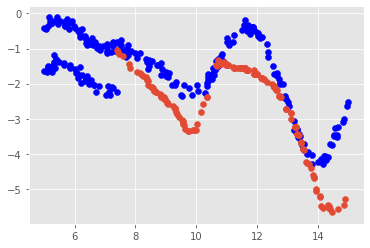

Epoch 0 batch 900 train Loss 0.4779 test Loss 0.4931 with training MSE metric 1.3046 and testing MSE metric 1.2674
learning rate is 0.0003000000142492354
r squared training, series 0: -0.11991147352729126, series 1: -0.17208375235267656
r squared testing, series 0: -0.030524219763862815, series 1: 0.11131575909881031
p:  0.29083338249863966
1
[0.023505668073357338 0.019270474470275283 0.049937951176952579 ... -0.028406997448396944 0.0085802506982374464 0.025883196343215172]
p:  0.5278907683503865
1
[0.023535185459890872 0.019310785899070849 0.049885508226491432 ... -0.028412956187171219 0.00858011605532644 0.025920168771974127]
p:  0.9088950234669996
0
[-0.008035087134479443 -0.048952242940824876 -0.0022164196575300246 ... -0.016359084108164074 -0.027070219249761215 -0.027795585493928746]
p:  0.9300477667993651
1
[0.023514993179993362 0.019277791176917441 0.049663592674436589 ... -0.028381865594758766 0.0085199570111612645 0.025884820937297905]
p:  0.9716207881443808
0
[-0.008045270426

p:  0.2918063485947734
1
[0.023437432689359092 0.01918843564783581 0.04917990370228173 ... -0.028335807637614209 0.0084482194608145982 0.025776238473066412]
p:  0.9621460073529005
1
[0.0234540473869288 0.019219207545193295 0.049184266331849649 ... -0.02834647357244394 0.0084723549127398122 0.025785566767136291]
p:  0.7758671728873472
1
[0.023505589533202118 0.019285839528866262 0.049226320217893561 ... -0.028374363503665762 0.0085287364150075391 0.025839061954665305]
p:  0.24356476370604463
1
[0.023531760533192694 0.019312392159488229 0.049243670597945453 ... -0.028385836420199751 0.0085637747680423863 0.025839728896743394]
p:  0.32992086105327467
1
[0.023555334082801506 0.019336309463168229 0.049259298966839678 ... -0.028396170659185947 0.0085953355933054715 0.025840329645367192]
p:  0.04096833524168686
0
[-0.0079387612321655861 -0.0489375026982707 -0.0023399191264513049 ... -0.016557181226932925 -0.026842528416693649 -0.027863657379769254]
p:  0.25326161488213217
0
[-0.00797919282932

p:  0.7093882724537898
1
[0.02354123190030805 0.019268481386513547 0.049080479702169125 ... -0.028339413656675968 0.00856781470124508 0.025634370169822892]
p:  0.7600969286113115
1
[0.023530537233773071 0.019280429032492434 0.049063443815503309 ... -0.028331848866259359 0.0085483818835736455 0.025636266561001982]
p:  0.17477015252859662
1
[0.023568489509320265 0.01939073552409078 0.049122610136685375 ... -0.028363405040079906 0.0085984395354679038 0.025732266997542771]
p:  0.514421209861158
0
[-0.0080591650805794755 -0.049343642847334328 -0.0023604109763749508 ... -0.016383541206071474 -0.026940284897161791 -0.028273865261023177]
p:  0.616045670937259
0
[-0.0080798449037358146 -0.049340947378867545 -0.0023414767391170153 ... -0.016368076277571947 -0.026947747475990273 -0.028279528849210984]
p:  0.4159901900071088
1
[0.023645152352202159 0.019614956229025031 0.049142001775216854 ... -0.028408310311611045 0.0086544650808478684 0.025889869405802877]
p:  0.7344348822502251
1
[0.02365678534

p:  0.629617736064226
1
[0.023624665892054909 0.019638074780731991 0.048699118679732332 ... -0.028347702040742398 0.0084976413172104942 0.025755653572605442]
p:  0.24769744572889763
0
[-0.00818933000689893 -0.049261701531061131 -0.0023399244258453886 ... -0.016317324346520844 -0.02691770824695329 -0.028345920891453404]
p:  0.8065314158348316
1
[0.023658918527224473 0.019755801828435161 0.048862126651694718 ... -0.028390148373363257 0.0086032261695538747 0.02584474014612663]
p:  0.9800271659809275
1
[0.023652554497902066 0.019781786274643887 0.0489231827361126 ... -0.028405631800247896 0.00864364527326746 0.025864182873811554]
p:  0.6626651994683888
1
[0.023653922673918446 0.019825147647003563 0.048993936134635617 ... -0.028423936510000882 0.00868875711111426 0.025889569347733676]
p:  0.5173357934042164
1
[0.023631170480693783 0.019801735700688768 0.048955625945841331 ... -0.028413323140029926 0.0086676577421794174 0.025858981021103837]
p:  0.7064457325558815
1
[0.023607845144336864 0.0

p:  0.620376142652026
0
[-0.0077268520516876231 -0.048687011557815553 -0.0024922378356793153 ... -0.016938896760575257 -0.026316758365579541 -0.027992907622607786]
p:  0.008373179038039469
1
[0.023403787528334836 0.019278645244595761 0.048110920615965891 ... -0.028201088891456522 0.00829358088330844 0.02531852183145104]
p:  0.8277044249880142
1
[0.023393517075775173 0.01926228412821979 0.048064135679086746 ... -0.028187476999969898 0.00829405406243392 0.025288203762695968]
p:  0.6157314079815852
0
[-0.0076444478677816534 -0.048575692443889075 -0.0026024512939683327 ... -0.017120952437617531 -0.026104291660330341 -0.027903778890170896]
p:  0.1415804812105127
1
[0.023360366914550994 0.019224420550183367 0.048029366978854952 ... -0.028165386134099545 0.0083060424458979466 0.025233123446784626]
p:  0.8624102694873093
1
[0.023339438877369306 0.019201183752686157 0.0480167883616443 ... -0.028153631501905595 0.0083058863501 0.025206316546888277]
p:  0.6898552875499048
0
[-0.007828406363901953

p:  0.3512452518597563
0
[-0.0081642712428991356 -0.04902093568027846 -0.0029149100135164837 ... -0.016435064293121717 -0.026326846502947223 -0.028425768714009154]
p:  0.5465216853722703
1
[0.023809146067967621 0.019633892981558671 0.048582445682388883 ... -0.028374956967950067 0.0087383830709738455 0.02585717928460406]
p:  0.945613724941917
1
[0.023788547628320975 0.019607000287167928 0.048660493165054365 ... -0.028370936470350057 0.0087416517296898012 0.025888189657279844]
p:  0.6885104044227571
1
[0.023741871171141442 0.01955865690871925 0.048720852310841681 ... -0.028353379635827076 0.0087265656353564813 0.025890890251066428]
p:  0.2794831851849876
0
[-0.00863375272942007 -0.049515568825514104 -0.002936171505997075 ... -0.01589848089415161 -0.026633220722655504 -0.028875897073400544]
p:  0.6409396779594323
0
[-0.00867804610152318 -0.049548573002002563 -0.0029304683470272952 ... -0.015805365755488836 -0.026675785598087753 -0.028959850350345932]
p:  0.6982337042551889
0
[-0.008717942

p:  0.8644606633000137
0
[-0.0087209991712770118 -0.049522491134420081 -0.0028806581053428546 ... -0.015553126628339029 -0.0267492103786465 -0.029217421697072934]
p:  0.9596170030644299
1
[0.023614247363157568 0.019182047455405239 0.0485725464626855 ... -0.028268715448423069 0.0084430688580924059 0.025810197930392124]
p:  0.1746802461098087
0
[-0.0085905347713057367 -0.049360754418951505 -0.0028068766260767831 ... -0.015657121816862105 -0.026675208139240035 -0.029135684170876714]
p:  0.04094651208289479
0
[-0.0085078937564959586 -0.049272628618125307 -0.0027847635382326386 ... -0.015741447206622808 -0.026622744915331523 -0.029073320176778997]
p:  0.02677887159114467
0
[-0.0084474641668597 -0.04922404755505793 -0.0027616328174560139 ... -0.015795439198908839 -0.026600148156668908 -0.029051570844165195]
p:  0.6341357480501494
1
[0.023793129624965097 0.019442854585406431 0.048630911838535469 ... -0.028366367458880676 0.0085526768263720476 0.026088403206390009]
p:  0.9842161090191794
0
[-0

p:  0.8448859411981636
0
[-0.007759242133423592 -0.04866179441139807 -0.0028128129515675128 ... -0.016449683608456712 -0.026229019426202652 -0.028830275787386866]
p:  0.05307383952391265
0
[-0.0077493121742239005 -0.048658452556289075 -0.0028290823591735 ... -0.016470280790841466 -0.026225370758441332 -0.028864512716818027]
p:  0.029992717490524345
0
[-0.0077761988969951706 -0.048681916825775932 -0.0028180469564909327 ... -0.016470571233867016 -0.026240292296178972 -0.02888583613637518]
p:  0.5756376038024357
0
[-0.0077825595809126 -0.04866918279394724 -0.0028042138531879732 ... -0.016481117918806066 -0.026226448140176457 -0.028875011645243281]
p:  0.033013496895281436
1
[0.023508326723284036 0.019037820572802816 0.048114370147574706 ... -0.028207368465065902 0.0082272819673355757 0.025690526744709549]
p:  0.17127408243284048
1
[0.023483964425095191 0.019013797596593995 0.04808104741554875 ... -0.028201323741909926 0.0082145957016946762 0.025663273279918224]
p:  0.2406714241486203
1
[0

p:  0.737908451686881
1
[0.023483413226625997 0.018884386258203805 0.047937648746102783 ... -0.028154365070865734 0.0081352173230367711 0.025581229671870733]
p:  0.7560811540042671
1
[0.023486362593689983 0.01884436924148785 0.047879779506583321 ... -0.028137740071215573 0.0081065414148330673 0.025535736388286021]
p:  0.04755416319358641
1
[0.0234898441969929 0.01881173433778827 0.0479085053845807 ... -0.028123991620426548 0.0080898911107253422 0.0255216030548793]
p:  0.31147774310257725
1
[0.023492980122016314 0.01878233965891048 0.04793437915344189 ... -0.028111608213323137 0.0080748939668728661 0.025508872979039445]
p:  0.5355361601555501
1
[0.023495804688849573 0.01875586350455459 0.047957683980062712 ... -0.028100454323833911 0.0080613858520346363 0.0254974068406934]
p:  0.29009796729592097
0
[-0.0078075422137470572 -0.048403928737817667 -0.0028320762226905333 ... -0.016682164506437704 -0.026057547528538314 -0.029090148350867089]
p:  0.9642467647566888
1
[0.023559544643964148 0.01

p:  0.8244856470026832
1
[0.02392506252100824 0.019186997852259951 0.048513979229157636 ... -0.028254575634412547 0.0084110418284266374 0.02592427374301904]
p:  0.11739794678889637
1
[0.023970018634936942 0.019214131681112204 0.048532420994727328 ... -0.028263645926941892 0.0084395196495566042 0.025947052111879188]
p:  0.7117623367398531
1
[0.024010510983620805 0.019238571348205207 0.048549031647481269 ... -0.028271815615499421 0.00846516986191302 0.02596756877975467]
p:  0.6150158162973298
0
[-0.00792083688543335 -0.048514949912732634 -0.0029569683854872471 ... -0.016561332997192535 -0.026114571902890269 -0.029632652691818383]
p:  0.7579805547157336
1
[0.024070791413544915 0.019224710333159891 0.048447215780647715 ... -0.028272702121743865 0.0084749456542095765 0.025914130868503991]
p:  0.6217004202371567
1
[0.024074588429465429 0.019176139320245519 0.048342551078007424 ... -0.028249302744936682 0.0084419459799885254 0.025834194636108778]
p:  0.13458969544460364
1
[0.02406422852417831

p:  0.9438632945661054
1
[0.024275963753684987 0.019199371827085854 0.048004145620526607 ... -0.028241127706476944 0.0082785200749078778 0.025808708256579237]
p:  0.018064453434115113
1
[0.024330355173567391 0.019219852113647493 0.047945034477215043 ... -0.028253517836826791 0.00825768419505176 0.025841114385855447]
p:  0.010259018242877449
0
[-0.0081156387844064475 -0.04864569277121597 -0.0029737218944873114 ... -0.0161420903933537 -0.026266511709496523 -0.030196549127953318]
p:  0.1680173127314366
0
[-0.00802570645568575 -0.048523422337116269 -0.002937099984415581 ... -0.016241991376589632 -0.026165214998265515 -0.030100916361916738]
p:  0.7160398414710538
1
[0.024463216017359939 0.019269878903833429 0.047800644859988278 ... -0.028283782963053488 0.0082067888035920137 0.025920272196525894]
p:  0.9938499129689976
1
[0.024459757465379765 0.019263492512728006 0.047722626722079692 ... -0.028267131372973108 0.0081603226856312959 0.02592230126271201]
p:  0.3854386457545582
0
[-0.0078796237

p:  0.6541006339606399
0
[-0.00807515608935847 -0.048469968420401938 -0.0024640315564504328 ... -0.016186890656153429 -0.02608529944689407 -0.029993044564922744]
p:  0.5265407081169754
0
[-0.00813546648386219 -0.048535306391650428 -0.0024356020681796232 ... -0.016123411755456857 -0.026128384088968056 -0.030050350728246945]
p:  0.25724476068130975
1
[0.024248784153517538 0.019016310546374083 0.0470908459976516 ... -0.028074185328160074 0.0078124284833041508 0.02563977371434276]
p:  0.6287743302891275
0
[-0.008222771362783713 -0.04863350178595325 -0.0023768499198552114 ... -0.016027255577395996 -0.026195227209116913 -0.030145401034970119]
p:  0.9603577797168268
1
[0.024303738541780064 0.019103937069923343 0.047147225169637361 ... -0.028113321629339379 0.00792268801544592 0.025686905430497484]
p:  0.8489027620904361
1
[0.024330249845800477 0.0191241930380262 0.047156934286023161 ... -0.028127575502129569 0.0079840987467478582 0.025678574418614208]
p:  0.6690892797935079
1
[0.0243306833105

p:  0.09923885274726707
1
[0.024563920641830127 0.019312141463698838 0.047215954017051684 ... -0.0282920872958411 0.0084144355144404916 0.025753381742830046]
p:  0.5182469101569808
1
[0.024595460999847021 0.01936155643321091 0.047259248933283128 ... -0.028317018010067568 0.0084781818634586132 0.025789948008900224]
p:  0.38112557209404285
1
[0.024626943785244656 0.019403725178749956 0.047272456270367344 ... -0.02833707650346701 0.0085313521577323574 0.025814255584295523]
p:  0.5007360157280348
1
[0.024655300138940055 0.019441706311856113 0.047284352038644145 ... -0.02835514306679679 0.0085792423192751922 0.025836149269998141]
p:  0.9458757674597302
0
[-0.00780329188429074 -0.048245025349388432 -0.0022942802240432467 ... -0.016382093187243069 -0.026167049762854163 -0.030224672855577232]
p:  0.13334079979334412
1
[0.024568521689247419 0.019279670446021122 0.046995970333138133 ... -0.02828440225076188 0.00846264278221073 0.025650633161101055]
p:  0.2249263058393408
0
[-0.007688465781695060

p:  0.08303061985086535
0
[-0.0076696488716337411 -0.047927425897221432 -0.0022801248183395191 ... -0.016614265400276992 -0.026094237919717243 -0.030220695004009732]
p:  0.5337201691225094
1
[0.024240645622160745 0.01895622029318399 0.046711898569388226 ... -0.028132298447104718 0.0082074524062529675 0.025359635158939246]
p:  0.03763302002935465
0
[-0.0076930263341153807 -0.047921428888279653 -0.00225119213595396 ... -0.016612049988522504 -0.026082174329208053 -0.030266875091993078]
p:  0.9735638539512611
0
[-0.0077525537821396011 -0.047972465457778113 -0.0022661082921300655 ... -0.016525790152755789 -0.026144669988815632 -0.030365326832092646]
p:  0.9653369773908684
0
[-0.0078061695065776921 -0.048018433540413609 -0.0022795431115445433 ... -0.016448096857868584 -0.026200959149099791 -0.030454001242368738]
p:  0.9884692454482297
0
[-0.007854460586350951 -0.048059836475309453 -0.0022916437021638916 ... -0.016378119381458764 -0.026251658162446446 -0.030533869285747351]
p:  0.124814974203

p:  0.38912166498169476
0
[-0.00795828632093737 -0.048148162430270362 -0.0024032575831921237 ... -0.016165321782466865 -0.026323326721203855 -0.030839718328008674]
p:  0.41381135142191405
0
[-0.0080035033829545625 -0.048193141539655475 -0.0024434493967221737 ... -0.01611264015675783 -0.026361815460489081 -0.030925292407010842]
p:  0.8304721391780668
1
[0.024600914939907844 0.019592766379550548 0.047765256970615004 ... -0.028307943654158774 0.0086121753821217627 0.026052527792426103]
p:  0.5678079033602735
1
[0.024569120603764823 0.019578881088359739 0.047743494674086076 ... -0.028292611115529203 0.0085896013106635249 0.02604252118930056]
p:  0.24837784087226678
1
[0.02449881674966866 0.019511862506102182 0.047684695059247356 ... -0.028264349343735503 0.0085371104295384123 0.02598321828941778]
p:  0.7671478360171136
0
[-0.0079749292805086028 -0.048200168488879487 -0.0026996172238627392 ... -0.016055425439857985 -0.026433435379209568 -0.031241022036492778]
p:  0.35192496025077424
1
[0.02

p:  0.8113023874367028
1
[0.024123760060787376 0.019122981897500616 0.047258651809179576 ... -0.028100876208396353 0.008139963606892538 0.025654726564581457]
p:  0.10800602234141687
1
[0.024127461029867035 0.019109778145666161 0.047176256490905136 ... -0.028096877791747785 0.008102190253653321 0.025637862751530779]
p:  0.5759292113415216
0
[-0.0071350783121731766 -0.047313356797328739 -0.0030672512440010329 ... -0.01666323056357763 -0.0260410039852082 -0.031123197757586159]
p:  0.7543223407521057
0
[-0.00710112001094399 -0.04727993704600561 -0.0031247044763681019 ... -0.016663629573240954 -0.026058637262152226 -0.031163471207823489]
p:  0.8167099781252264
1
[0.024110178896389157 0.019066333074761584 0.047040973227835417 ... -0.028093895099675623 0.0080045679293713375 0.025625835540350705]
p:  0.3464989556434568
0
[-0.0070429866017075096 -0.047222725583314265 -0.0032230589910713031 ... -0.016664312640153341 -0.026088823769348308 -0.031232415556271223]
p:  0.8271058550995892
0
[-0.007009

p:  0.13141237404910222
0
[-0.00698777272645392 -0.047149594046811974 -0.0033477085249901473 ... -0.016714224911654058 -0.026084596429576744 -0.031423824229911052]
p:  0.8597244337611509
1
[0.023839329582882939 0.018939902919454032 0.047901426537812465 ... -0.02813674248584885 0.0081830878700787733 0.025930196817282421]
p:  0.03567607678591278
0
[-0.00707641045141472 -0.047256931714157256 -0.0033780875991836472 ... -0.016597732467999497 -0.026188899214708385 -0.031647742605852014]
p:  0.2776168267579294
1
[0.023708817760365628 0.018801591278121164 0.047899795421019388 ... -0.028078721873797008 0.00812512880062478 0.025845284231467033]
p:  0.006560152276561593
0
[-0.0071003194205669969 -0.047295852131344206 -0.003324595839385539 ... -0.016604730533717259 -0.026184003693496806 -0.031707536716711671]
p:  0.4059117549676209
0
[-0.0070668814957031935 -0.047261206974690592 -0.0033006855086297067 ... -0.016666075924571665 -0.026109769416539287 -0.03167469562705847]
p:  0.08260226506601398
1
[

p:  0.6861595876964581
1
[0.023489793871073666 0.018474747374406922 0.047735053461942206 ... -0.027932962515906896 0.0080273950831376735 0.025564225888183158]
p:  0.38198175419105573
0
[-0.0075276578011912775 -0.047685507718005019 -0.0031068934933904391 ... -0.016106734681511432 -0.026094118563595729 -0.032169445543419613]
p:  0.67655126732259
0
[-0.007419510347575522 -0.047572517447243251 -0.0030908563997853115 ... -0.01620432415363153 -0.025964525818734339 -0.032098619300006188]
p:  0.021152221385462022
0
[-0.0073221048856422265 -0.047470750191860887 -0.0030764122270562216 ... -0.016292220329397231 -0.025847805167890571 -0.032034828034436927]
p:  0.8859345153039745
0
[-0.0072746526188327814 -0.047429439803133668 -0.0030956892240653019 ... -0.01631259207444381 -0.025792074207336157 -0.032038775793716771]
p:  0.8572257640841228
1
[0.0237786447877002 0.018723912850203878 0.047840282472182472 ... -0.02801916932167603 0.008227259533868006 0.025750125207208575]
p:  0.046234353276976003
0
[

p:  0.6268753775946925
1
[0.023859782445535757 0.018578340536634892 0.047343387425056324 ... -0.027922979267309536 0.0080540126425206471 0.025578980292900295]
p:  0.2659210269089065
1
[0.02384689680964357 0.018592385097072322 0.047353579786771779 ... -0.027917264316029245 0.0080607460079229355 0.025596302438650582]
p:  0.40084351433344945
1
[0.023835291115478462 0.01860503459876919 0.047362759732053339 ... -0.027912117035942031 0.0080668105421556838 0.025611903960260026]
p:  0.442711600471714
0
[-0.0074189330207438649 -0.047489017593461906 -0.0029801723504506313 ... -0.016278290963220272 -0.025538028814078791 -0.031854077358890336]
p:  0.9456483759226539
0
[-0.007508739637735338 -0.047574190344383725 -0.002971461475125366 ... -0.016163414386896807 -0.025606799732009921 -0.0319273857449776]
p:  0.2304583125139753
1
[0.023803900542314949 0.018647423983709995 0.047430574844691153 ... -0.02791165146010012 0.0080905877910940355 0.025677429406056381]
p:  0.09607950636870743
1
[0.023793522055

p:  0.9552816201360576
0
[-0.0077130498712756285 -0.047768396697652656 -0.0029316920076256289 ... -0.015845827564948473 -0.0258339088889244 -0.03220173735091604]
p:  0.04138409413927824
1
[0.0238470262337111 0.018743424009780837 0.047384189259493767 ... -0.027836982876751761 0.008079267740882726 0.025632621211403004]
p:  0.36479604535914956
1
[0.023861688439059184 0.018748272768040936 0.047337808797101519 ... -0.027819556292688268 0.0080616921581359354 0.025610980751310297]
p:  0.07298216170187122
1
[0.02387489417323186 0.018752639874565286 0.04729603554129571 ... -0.027803860779475904 0.0080458624470235423 0.025591489947713354]
p:  0.7624737245653019
0
[-0.0077082155075070069 -0.047752157486155168 -0.0029798516451513364 ... -0.015841722083375278 -0.025888999022555363 -0.032287756183979666]
p:  0.17708157996565366
1
[0.023873858939072259 0.018737790958204961 0.047234509809301925 ... -0.0277728866404114 0.00801252024440845 0.025543934569270982]
p:  0.04625389578999939
1
[0.0238622140998

p:  0.2270254208221094
1
[0.02393861257422035 0.018738172262975965 0.047278573399729372 ... -0.027793593641845062 0.00809915954142159 0.02549323389975517]
p:  0.31278717005356005
0
[-0.0079254666223928776 -0.047825437092077289 -0.0029071865179958974 ... -0.015772904207822812 -0.026053571252022775 -0.032620888562597608]
p:  0.8583477495744144
1
[0.023987345940828884 0.01872754569678203 0.047252236059636819 ... -0.027805296691885126 0.0081107654740161083 0.025450771691864514]
p:  0.09883605427436526
1
[0.023996707285147228 0.018716755076983473 0.047208162064163055 ... -0.027814341352287685 0.0081052654291134014 0.025435425295977348]
p:  0.5928511367233462
0
[-0.0078721352211811244 -0.047686100362013567 -0.0028614542770872462 ... -0.015808713473848404 -0.025998325476369929 -0.03264776907783757]
p:  0.0815507810031404
0
[-0.0078172172572107887 -0.047600434944578 -0.0028450764440154379 ... -0.015857014684672634 -0.025951549535820014 -0.0326201811560666]
p:  0.7732766306541126
1
[0.024133709

p:  0.6145086903407645
1
[0.024135060917411143 0.018820437487802578 0.047196085872962618 ... -0.027938332213358834 0.0081269341334693559 0.025641207696449946]
p:  0.7785935953130544
1
[0.024136155274323043 0.018814251082208404 0.04725009550196594 ... -0.027937381965081037 0.0081442076570177411 0.025677574490698556]
p:  0.8837053330463435
1
[0.024128232271282361 0.018829624062957788 0.047336152057781265 ... -0.02794424547002718 0.0081799075569281964 0.025749497661580065]
p:  0.010456450166299036
1
[0.02413455828312604 0.018856283150064386 0.047459113945162411 ... -0.027962905799924605 0.00824176520878864 0.025831617661787262]
p:  0.43114514713268537
0
[-0.0074666138700144481 -0.047076097982498843 -0.0026504935987334446 ... -0.016167450432180083 -0.025570052003094767 -0.032464593913109754]
p:  0.6630402705504248
1
[0.024145387405150924 0.018901919249776755 0.047669605058357954 ... -0.027994849304910831 0.0083476556310694873 0.025972193988747668]
p:  0.5261173719086989
1
[0.02412735245732

p:  0.4117938223914658
1
[0.023931804890985307 0.018586238389823047 0.047871292956835711 ... -0.027935958001667965 0.0081839150457061628 0.026019195271881249]
p:  0.21990302879125878
0
[-0.0074971347748782188 -0.047207390556170292 -0.0026109422717478649 ... -0.016101542582509037 -0.0252264108003959 -0.032448249279323382]
p:  0.32562832491002547
0
[-0.0073481845979261736 -0.047091206544176853 -0.0026435970796783339 ... -0.016209851414510409 -0.025139946242328588 -0.032411157136710257]
p:  0.09359099868420784
1
[0.023866028651147963 0.018523958397493094 0.0480568711326867 ... -0.027933975449335995 0.00817543269010248 0.026078598845769324]
p:  0.7816791199675727
0
[-0.0071485840179217356 -0.04696384882511704 -0.002792443837566981 ... -0.016252304802217777 -0.025075816389970827 -0.032510822227065528]
p:  0.045142225453490226
0
[-0.0070789425836243662 -0.046924226630500644 -0.0028715170265184243 ... -0.016239774791834388 -0.0250755530389503 -0.0325912535185036]
p:  0.91728331713435
0
[-0.00

p:  0.5849118597780893
0
[-0.0065857484914431221 -0.046592388892838732 -0.0033928214783982185 ... -0.016425781565819229 -0.024945712749285882 -0.032743622060808678]
p:  0.4482092220522923
1
[0.023480601799683837 0.018082856489249385 0.048199595574418538 ... -0.027788689584365166 0.0078393633107962275 0.025564213775255716]
p:  0.14627479181217962
0
[-0.00654516044596271 -0.046579196615955394 -0.0034767394821444437 ... -0.016437630650996526 -0.02491083297847238 -0.03275829060567622]
p:  0.7431503234027371
1
[0.023534418184100733 0.018161468546204991 0.048324687678585027 ... -0.027837459668227788 0.0078934763671470766 0.02556080046804406]
p:  0.27813800328456795
0
[-0.0067031580205866069 -0.046701379295563859 -0.00353638930674949 ... -0.016257624047706438 -0.024960157691914394 -0.03285659415665837]
p:  0.2361877307871436
1
[0.023529719103189843 0.018167432045224027 0.048340631215569106 ... -0.027842411919489173 0.0078789033927625356 0.025503459546621039]
p:  0.6565499040467104
0
[-0.00697

p:  0.4901230652517049
1
[0.023411084903886586 0.018182710256884494 0.048192145983887769 ... -0.027819420294474463 0.0077766117384610832 0.025296268829747181]
p:  0.3988866629859098
1
[0.023411420961949665 0.018219281353739351 0.048188462589257956 ... -0.027832199923122889 0.0077858236471708264 0.025300598360645292]
p:  0.23398528822164177
0
[-0.0071051343895560982 -0.047075273630915522 -0.003537561125380661 ... -0.016004798864159096 -0.024894233902093919 -0.032923292490859034]
p:  0.7997577162251204
1
[0.023411996230328507 0.018281884212918785 0.048182157308479419 ... -0.027854076250796223 0.0078015927073849418 0.025308009705626126]
p:  0.1435921054605559
1
[0.023420309698653819 0.018298532418962683 0.048114519380490696 ... -0.02785240899533618 0.0077758205930725226 0.025276267992600569]
p:  0.39361359635803694
0
[-0.00668698693363105 -0.046730586149448479 -0.0035790627821013924 ... -0.01644857891523736 -0.024556934618053687 -0.032578706402951595]
p:  0.7909759945691706
1
[0.023434540

p:  0.041664078719745645
0
[-0.0066223726756093719 -0.046644445201038671 -0.0036589145426484276 ... -0.016377436294866838 -0.024432351192924428 -0.03223335837056214]
p:  0.8631441542564077
0
[-0.00665116053551153 -0.046648415194830178 -0.0036286962327774551 ... -0.01636145521392781 -0.024416798022920967 -0.032169037078372542]


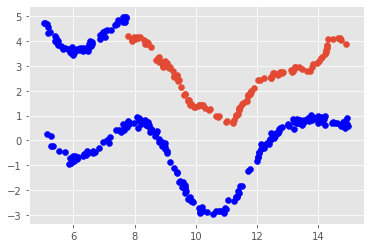

Epoch 0 batch 1200 train Loss 0.3484 test Loss 0.4878 with training MSE metric 0.8330 and testing MSE metric 1.0892
learning rate is 0.0003000000142492354
r squared training, series 0: 0.2724444594347646, series 1: 0.11719530091965179
r squared testing, series 0: 0.17631601512813216, series 1: 0.1796670257039067
p:  0.08418217012993512
0
[-0.00665116053551153 -0.046648415194830178 -0.0036286962327774551 ... -0.01636145521392781 -0.024416798022920967 -0.032169037078372542]
p:  0.19521262637906145
1
[0.023500322023783889 0.01837635789978017 0.047798324649661293 ... -0.027932904353535511 0.0075773314179668257 0.025232974762637594]
p:  0.3220042204786717
0
[-0.0067466968132544 -0.046694086929437446 -0.0035753304953511146 ... -0.016248072549711213 -0.024414493341108286 -0.032125192512833231]
p:  0.5090111811737179
1
[0.023536189887968743 0.018448265261941325 0.047872920545973745 ... -0.02798806166529293 0.0076232272967048428 0.025336171775961633]
p:  0.035272980007853505
1
[0.02354341318136

p:  0.9557040994898142
0
[-0.0068200449004888856 -0.0467608819173831 -0.0035987240659130625 ... -0.015974152202713185 -0.024436433777395506 -0.032400189687577047]
p:  0.5047907900557078
1
[0.02351577741565139 0.018431054101150698 0.047919074946072823 ... -0.028098166950195687 0.0076153302045816737 0.025546465173900777]
p:  0.2629305668543823
0
[-0.0066432828109817795 -0.046592318675439448 -0.0035977697298796812 ... -0.016120072832648893 -0.024299397561140156 -0.032356243537513048]
p:  0.5007534671733791
1
[0.023510459917041315 0.018480819537272097 0.047950641827525446 ... -0.028115529770263114 0.0076268899005258323 0.025651402133704808]
p:  0.8260967255491443
0
[-0.0066147305634364694 -0.046566784801905 -0.0035739326426783478 ... -0.016105197259278094 -0.024279557867348905 -0.032410784128144486]
p:  0.5276151561634302
1
[0.023461643064662148 0.018429608286013022 0.047850138265348549 ... -0.028084631264260428 0.00754431486750603 0.025658138786502787]
p:  0.09168779050250575
1
[0.0234616

p:  0.6543083978714835
1
[0.023484446891009314 0.018216035685279394 0.047709103646732608 ... -0.028051479292474181 0.0073079583882088052 0.025645619091208435]
p:  0.3419533372525657
1
[0.023499808549374473 0.018237164416852514 0.0477795436246353 ... -0.028079082319380822 0.0073384477952462062 0.025694644288716671]
p:  0.3906901035830075
0
[-0.0064605704356123558 -0.046312510143056533 -0.0032740152874123451 ... -0.016176909215500423 -0.024087964329354086 -0.032287789089007084]
p:  0.9188596799861906
1
[0.023526104403390244 0.018273332259400862 0.047900121710818255 ... -0.028126332762902589 0.0073906391006401829 0.0257785648795695]
p:  0.38544642780974414
1
[0.0235217545535687 0.018245075625666542 0.04790426474080204 ... -0.028135762064864556 0.007388844689754496 0.025783373306279046]
p:  0.5093782415074442
1
[0.023517836919646328 0.018219626667334791 0.047907996105197456 ... -0.028144254439296013 0.0073872285776393114 0.025787703951349536]
p:  0.835271634353086
1
[0.023492155405624011 0

p:  0.22390454601532261
0
[-0.0068936030387256163 -0.046710484333863878 -0.0033919987137662625 ... -0.015575106977896103 -0.024351736150733862 -0.032536782554775739]
p:  0.6596706762872097
0
[-0.006859414062209631 -0.046698289883819244 -0.0033517076091387778 ... -0.015608866762252538 -0.024299393717446292 -0.032478973465169314]
p:  0.9869199019136589
0
[-0.00682862229917013 -0.04668730714450408 -0.0033154200608514852 ... -0.01563927198008758 -0.024252252329613474 -0.03242690861960177]
p:  0.3905532924738271
0
[-0.0068008901908981354 -0.046677415716211736 -0.0032827382618728644 ... -0.015666655952568158 -0.024209795193630132 -0.032380017250390442]
p:  0.6555217150441724
1
[0.023330948743655912 0.017777117665722205 0.047547756705244179 ... -0.02815802109267972 0.0070806418024033776 0.025372227277416871]
p:  0.19505898797555687
1
[0.023442673551061624 0.017840706507986394 0.047523710597943553 ... -0.02818776145430639 0.00707051348615471 0.025404890132190831]
p:  0.7565268838393442
1
[0.02

p:  0.7802009146964325
0
[-0.0063489409184124207 -0.04632806298349116 -0.0034938042512674592 ... -0.0158564733519473 -0.023886369178140819 -0.032336559150906823]
p:  0.26578645229586306
0
[-0.0063213481945469645 -0.046306442547079954 -0.0035118331937146296 ... -0.015860582035366073 -0.023873395634464521 -0.032343135110646216]
p:  0.09095684002444704
1
[0.024224616009997906 0.018656976932644297 0.048206390375609989 ... -0.028573520686127958 0.0075059509905478885 0.02608599059899934]
p:  0.8476557158867422
1
[0.024293612156354661 0.018739463501419289 0.048328513437052724 ... -0.028624312172721256 0.0075770012506875956 0.026190952498611281]
p:  0.9079297426188201
1
[0.024345909581154682 0.018811332364590407 0.048409016499801484 ... -0.028668262113048605 0.0076304151637093236 0.026268574924184104]
p:  0.24634630044292327
1
[0.02436187543100406 0.018821093285669988 0.048405110070017451 ... -0.028685695291109474 0.0076222118574180214 0.026284305394292662]
p:  0.031643101854451516
0
[-0.00695

p:  0.6775923039157661
0
[-0.00712153073285375 -0.047088952279344849 -0.003438437233647825 ... -0.014728935120279866 -0.02420779793097199 -0.033085963794477855]
p:  0.42216415502662663
0
[-0.0071046966221503293 -0.047066936659750626 -0.0034203235238811905 ... -0.014718250190793682 -0.024172830305321035 -0.0330968080282971]
p:  0.030103458522894977
0
[-0.0070831323117889512 -0.047040462876933267 -0.0034210210259759881 ... -0.014708962848766138 -0.024128224022849316 -0.033091202911289905]
p:  0.8638678251589333
1
[0.024029912742716281 0.018329276949171025 0.047963768052652685 ... -0.028581364033383305 0.0071057210123522951 0.025967192989732726]
p:  0.2633377228701078
1
[0.024038865064174894 0.018350105314809958 0.047968855151403124 ... -0.028592285108370846 0.0071057798115124263 0.025966372612919241]
p:  0.6817532242077298
0
[-0.0069307502802923538 -0.046895758225077237 -0.0034651150751446266 ... -0.014795223351100574 -0.023990907308990381 -0.033023572847269762]
p:  0.6347843505834015
0


In [ ]:
if __name__ == '__main__':
    EPOCHS = 75; batch_s  = 64; run = 101; step = 0; train_steps = 35000; heads = 32; ℯ = 256; context = 10
    l = [256, 256, 64, 32]
    name_comp = 'run_' + str(run) 
    logdir = save_dir + '/logs/' + name_comp
    writer = tf.summary.create_file_writer(logdir)
    folder = save_dir + '/ckpt/check_' + name_comp
#     lr_fn = tf.optimizers.schedules.PolynomialDecay(9e-3, train_steps, 1e-7, 2)
    optimizer_c = tf.keras.optimizers.Adam(3e-4)
    ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context,  d = d)
    helpers.mkdir(folder)
    if d:
        decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
    else:
        decoder = experimental_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
    tf.random.set_seed(443)  
    num_batches = int(data[5].shape[0] / batch_s) if d else int(data[4].shape[0] / batch_s)
    ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
    manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
    ckpt.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("Restored from {}".format(manager.latest_checkpoint))
    else:
        print("Initializing from scratch.")
#     optimizer_c = tf.keras.optimizers.Adam(3e-4)
    with writer.as_default():
        for epoch in range(EPOCHS):
            
            start = time.time()

            for batch_n in range(num_batches):
                m_tr.reset_states(); train_loss.reset_states()
                if d:
#                     b_data = batch_creator.create_batch(em_x = data[-4], x = data[1], y = data[-3],  em_2 = data[-1], batch_s=64, d=d)
                    b_data, c = batch_creator.create_batch_2d(em_x = data[-4], x = data[1], y = data[-3],  em_2 = data[-1], batch_s=64)
#                     print('c: ', c)
                    if type(c) is list:
                        cols = [np.arange(c[i], b_data[2].shape[1] -1, 1) for i in range(len(c))]
                        cc = np.concatenate(cols, axis=0 )
                        rows = [np.repeat(i, len(m)) for i, m in enumerate(cols)]
                        r = np.concatenate(rows, axis=0)
                        to_gather = np.concatenate((r.reshape(-1, 1), cc.reshape(-1,1)), 1)
                    else:
                        to_gather = None
                    pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, b_data[2], b_data[0], d = True, x2 = b_data[3], to_gather=to_gather, context_p = c)
#                     pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, b_data[2], b_data[0], d = True, x2 = b_data[3], to_gather=None, context_p = context)
                else:
                    b_data = batch_creator.create_batch(em_x = data[3], x = data[0], y = data[4], batch_s=64, d=d)
                    pred, pred_log, weights, names, shapes = train_step(decoder, optimizer_c, train_loss, m_tr, x = b_data[2], y = b_data[0], context_p = context)
                if (epoch == 0) & (batch_n == 0): helpers.write_speci(folder, names, shapes, context)
                if batch_n % 300 == 0:
                    m_te.reset_states(); test_loss.reset_states()
                    if d:
                        b_data_te, c_te = batch_creator.create_batch_2d(em_x = data[3], x = data[2], y = data[6],  em_2 =  data[0], batch_s=64)
                        if type(c_te) is list:
                            cols = [np.arange(c_te[i], b_data_te[2].shape[1] -1, 1) for i in range(len(c_te))]
                            cc = np.concatenate(cols, axis=0 )
                            rows = [np.repeat(i, len(m)) for i, m in enumerate(cols)]
                            r = np.concatenate(rows, axis=0)
                            to_gather_te = np.concatenate((r.reshape(-1, 1), cc.reshape(-1,1)), 1)
                        else:
                            to_gather_te = None
                        
                        
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = b_data_te[2], y_te = b_data_te[0], x2_te = b_data_te[3], to_gather=to_gather_te, context_p = context, d=True)
                        
                        
                        idd = np.random.choice(np.arange(0, 64))
                        seq_l = to_gather[to_gather[:, 0] == idd][0, 1]
                        plt.scatter(b_data[1][idd, :seq_l], b_data[0][idd, :seq_l] , c = 'blue')
                        plt.scatter(b_data[1][idd, seq_l:], pred[idd][(seq_l - 1):])
                        plt.savefig('foo{}.png'.format((batch_n / num_batches) + (epoch + 1))
                        plt.show()
                        
#                         plotter.follow_training_plot2d(x_tr = b_data[1], y_tr = b_data[0], em_2_tr = b_data[3] , pred = pred, x_te = data[2][:500], y_te = data[-2][:500], em_2_te = data[0][:500] ,pred_te = pred_te, num_context = context)
                    else:
                        pred_te, pred_log_te = test_step(decoder, test_loss, m_te, x_te = data[2][:500, :], y_te = data[5][:500, :], context_p = context)
                        plotter.follow_training_plot(x_tr = b_data[1], y_tr = b_data[0], pred = pred, x_te = data[1][:500, :], y_te = data[5][:500, :], pred_te = pred_te, num_context = context)
                    helpers.print_progress(epoch, batch_n, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result())
                    helpers.tf_summaries(run, step, train_loss.result(), test_loss.result(), m_tr.result(), m_te.result(), weights, names)
                    print('learning rate is {}'.format(optimizer_c._decayed_lr('float32').numpy()))
                    if d:
                        m0, m1 = metrics.r_sq_2d(b_data[0][:, 1:], pred.numpy(), b_data[3][:, 1:], context_p = context)
                        m0_te, m1_te = metrics.r_sq_2d(b_data_te[0][:, 1:], pred_te.numpy(), b_data_te[3][:, 1:], context_p = context)
                        print('r squared training, series 0: {}, series 1: {}'.format(m0, m1))
                        print('r squared testing, series 0: {}, series 1: {}'.format(m0_te, m1_te))

#                     else: 
#                         print('r squared training: ', metrics.r_squared(m_tr.result(), b_data[0][:, (context + 1):]))
#                         print('r squared testing: ', metrics.r_squared(m_te.result(), data[5][:500, (context + 1):], batch_s = 500))


                    manager.save()
                step += 1
                ckpt.step.assign_add(1)

            print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

In [ ]:

# Save the weights we want to analyse as a variable. Note that the first
# value represents any unknown word, which is not in the metadata, so
# we will remove that value.
weights = tf.Variable(decoder.layers[0].get_weights()[0][np.concatenate(([0,1], np.unique(data[3]).astype(int))), :])
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(logdir, "embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(logdir, config)

In [9]:
decoder.A3.get_weights()[0]

array([[-0.00067615,  0.05615514,  0.06738966, ...,  0.07630116,
         0.02603091, -0.02499514],
       [-0.00445037,  0.0739135 ,  0.06490256, ..., -0.05417611,
        -0.042437  ,  0.08646967],
       [ 0.09078338,  0.03334402, -0.02741638, ..., -0.04715771,
         0.09397197, -0.02844256],
       ...,
       [-0.08380008, -0.0730588 , -0.02273733, ..., -0.01772035,
         0.00447622,  0.12148779],
       [ 0.08152599, -0.05984541,  0.00963409, ..., -0.07076796,
         0.02448639, -0.09745528],
       [-0.06458792,  0.0570612 , -0.00406764, ..., -0.00265749,
        -0.09037016, -0.09822507]])

In [ ]:
em_tr_2

In [37]:
xx[247]

14.929823735131858

In [35]:
np.unique(data[3])

array([241., 242., 243., 244., 245., 246., 247., 248., 249., 250., 251.,
       252., 253., 254., 255., 256., 257., 258., 259., 260., 261., 262.,
       263., 264., 265., 266., 267., 268., 269., 270., 271., 272., 273.,
       274., 275., 276., 277., 278., 279., 280., 281., 282., 283., 284.,
       285., 286., 287., 288., 289., 290., 291., 292., 293., 294., 295.,
       296., 297., 298., 299., 300., 301., 302., 303., 304., 305., 306.,
       307., 308., 309., 310., 311., 312., 313., 314., 315., 316., 317.,
       318., 319., 320., 321., 322., 323., 324., 325., 326., 327., 328.,
       329., 330., 331., 332., 333., 334., 335., 336., 337., 338., 339.,
       340.])

In [38]:
em

array([[1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
        0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
        1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [43]:
x_t = data[2][idx, :]

In [45]:
y_t = data[6][idx, :]

In [47]:
em_t = data[3][idx, :]

In [49]:
em2_t = data[0][idx, :]

In [53]:
x_t[np.where(x_t == 7.385577445634535)[0]]

array([7.38557745])

In [54]:
y_t[309]

0.9127748803217954

In [55]:
em_t[309]

264.0

In [56]:
em2_t[309]

0.0

In [58]:
decoder.embedding(0)

<tf.Tensor: shape=(512,), dtype=float64, numpy=
array([ 0.00034281, -0.05660817, -0.00242884,  0.02826494,  0.05410074,
        0.00902021,  0.03740817,  0.00669687,  0.03200907,  0.0334577 ,
        0.01902916,  0.03769331,  0.06629961,  0.05626754, -0.05191311,
        0.02305878,  0.0483908 ,  0.03543012, -0.05480604, -0.01493656,
       -0.06614347,  0.05128532, -0.02511129, -0.00556938,  0.03826302,
        0.01991776,  0.01459734,  0.00739122, -0.02267411,  0.0175861 ,
        0.01330454,  0.00324987, -0.06697834, -0.05136501, -0.0184265 ,
        0.03932506, -0.01544611,  0.00084507,  0.04391793,  0.04779572,
        0.03838504,  0.00909136,  0.0054286 , -0.03871324,  0.02651691,
       -0.01703326,  0.05934025, -0.03525568,  0.04391223,  0.02788468,
       -0.05718574,  0.04728326, -0.031332  , -0.03035568, -0.03388605,
        0.00211812,  0.0342325 , -0.06528154,  0.04696693, -0.02660087,
       -0.01220594,  0.05658798,  0.02789567,  0.00084951, -0.00831896,
        0.006662

In [57]:
decoder.embedding(264)

<tf.Tensor: shape=(512,), dtype=float64, numpy=
array([ 0.01192533,  0.01743802,  0.0863186 , -0.04189705, -0.02271961,
        0.09682556, -0.07458587,  0.02941507, -0.0498574 , -0.04340535,
        0.08827094, -0.07793977,  0.07641014,  0.04222118,  0.04100723,
        0.00401398, -0.01330148,  0.00659937, -0.04067785, -0.01517294,
        0.09677176, -0.11208441, -0.0753881 , -0.02146526, -0.05302359,
       -0.07007252, -0.06001698,  0.0111846 ,  0.04718316, -0.02906682,
        0.01939971,  0.01288024,  0.02676155,  0.09857946, -0.07444574,
       -0.03304614,  0.04925435, -0.11313834,  0.10054532,  0.00142329,
       -0.10085777, -0.05341978,  0.01787975,  0.07927943,  0.03281651,
       -0.03178224, -0.08530949,  0.02617413,  0.08353607,  0.02272361,
       -0.0083225 , -0.01679901,  0.06461325, -0.07171301, -0.10612646,
        0.06809324,  0.00089103, -0.09021849, -0.02112054, -0.03513806,
        0.03993411, -0.04868795,  0.02580609, -0.02196348,  0.00263379,
       -0.047249

In [65]:
np.where(em2_t == 1)[0]

array([  0,   1,   2,   5,   9,  10,  11,  13,  14,  16,  17,  19,  20,
        22,  23,  25,  26,  28,  29,  31,  37,  39,  40,  41,  42,  44,
        45,  55,  56,  59,  60,  61,  62,  63,  65,  67,  68,  70,  73,
        75,  79,  80,  83,  84,  86,  89,  90,  92,  93,  96,  98,  99,
       104, 105, 110, 112, 116, 120, 126, 131, 132, 133, 134, 136, 137,
       138, 140, 141, 142, 147, 148, 151, 152, 154, 155, 161, 166, 168,
       169, 172, 175, 176, 177, 179, 180, 182, 184, 185, 188, 189, 190,
       192, 194, 195, 200, 202, 209, 213, 214, 215, 216, 220, 221, 224,
       227, 229, 230, 231, 232, 233, 235, 237, 244, 247, 248, 249, 251,
       252, 253, 255, 256, 258, 259, 260, 261, 263, 266, 268, 269, 270,
       272, 274, 276, 279, 280, 281, 284, 285, 288, 290, 291, 293, 297,
       298, 299, 301, 304, 305, 307, 312, 313, 314, 315, 316, 317, 318,
       319, 324, 326, 327, 328, 329, 330, 331, 334, 336, 337, 338, 339,
       340, 343, 344, 345, 346, 347, 350, 351, 353, 354, 362, 36

In [96]:
idxs_0 = np.argsort(x_t[np.where(em2_t == 0)])
idxs_1 = np.argsort(x_t[np.where(em2_t == 1)])

In [97]:
y_u0 = y_t[np.where(em2_t == 0)][idxs_0[:25]]
y_u1 = y_t[np.where(em2_t == 1)][idxs_1]

In [98]:
V = np.concatenate((y_u0, y_u1))

In [105]:
x_u0 = x_t[np.where(em2_t == 0)][idxs_0[:25]]
x_u1 = x_t[np.where(em2_t == 1)][idxs_1]
U = np.concatenate((np.concatenate((x_u0, x_u1)), x_t[np.where(em2_t == 0)][idxs_0[25]].reshape(-1)))

In [106]:
em_0 = em_t[np.where(em2_t == 0)][idxs_0[:25]]
em_1 = em_t[np.where(em2_t == 1)][idxs_1]  
Z = np.concatenate((np.concatenate((em_0, em_1)) , em_t[np.where(em2_t == 0)][idxs_0[25].reshape(-1)]))

In [107]:
em2_0 = em2_t[np.where(em2_t == 0)][idxs_0[:25]]
em2_1 = em2_t[np.where(em2_t == 1)][idxs_1]  
W = np.concatenate((np.concatenate((em2_0, em2_1)), em2_t[np.where(em2_t == 0)][idxs_0[25].reshape(-1)])) 

In [66]:
x_t[np.where(em2_t == 0)][:25]

array([ 6.40276171, 11.2091354 ,  7.32541093, 10.13859222,  9.3984167 ,
       14.17018054, 12.29557406,  8.80673852, 11.08067217, 12.99657135,
        9.27034108,  8.06254764,  5.55736066,  5.79623052,  7.14481779,
       14.72596074, 12.3471238 , 10.06666061, 13.63365906, 10.80697958,
        8.31768639, 13.19262565, 11.21540451,  6.09239009, 10.64655188])

In [59]:
x_t[np.where(em2_t == 1)]

array([11.97448839, 13.51554307,  6.64584863, 12.8632784 , 12.17619636,
       11.07176118, 11.86308229,  6.26714756, 10.6347308 , 12.03926348,
        7.16035335,  6.49112616, 12.50313112, 12.58049895,  7.71355084,
        7.34975178, 13.37818101, 13.33818234,  8.91190302,  6.35255468,
       14.76122927,  6.5349862 ,  9.16258564, 10.08732038, 14.21046182,
       12.3505882 ,  8.42987183,  9.09780619, 13.83540274, 12.85445763,
       14.16282647,  9.59994671,  5.19513608,  8.01664238, 11.07472245,
        5.54201922,  8.50381612,  7.54257939, 11.26437054,  8.03024137,
        7.04899821,  5.41161016, 14.41476353,  5.74308185,  5.20045931,
        5.04558136,  5.67932295, 10.66093769, 11.01533791, 13.58482037,
       11.1756601 ,  9.21631118, 12.17835814,  9.13093839,  9.96365818,
       11.30267327, 12.21220075,  8.89316684,  6.67831734,  8.56301561,
        8.47479105, 10.25926885, 10.18723339, 11.61175834, 11.77457002,
        6.70910712,  8.02924787,  5.4469129 , 14.33410495,  7.96

In [11]:
from inference import infer

In [12]:
from helpers import masks

In [154]:
combined_mask_x = masks.create_masks(U.reshape(1, -1))

In [161]:
combined_mask_x[:, :-1, :-1]

<tf.Tensor: shape=(1, 225, 225), dtype=float32, numpy=
array([[[0., 1., 1., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)>

In [163]:
x1 = decoder.embedding(Z.reshape(1, -1))

In [164]:
x2 = decoder.embedding(W.reshape(1, -1))

In [170]:
y_attn, _  = decoder.mha(V.reshape(1, -1)[:, :, tf.newaxis], x1, x1, x2, combined_mask_x[:, :-1, :-1])

(1, 32, 226, 16)


In [171]:
y_attn

<tf.Tensor: shape=(1, 225, 512), dtype=float64, numpy=
array([[[ 0.06684196, -0.0175858 ,  0.0537646 , ..., -0.03475624,
         -0.06539761, -0.04954356],
        [ 0.06695401, -0.01764346,  0.05541872, ..., -0.0345993 ,
         -0.06622512, -0.04957734],
        [ 0.07119502, -0.01508529,  0.07385991, ..., -0.03307079,
         -0.07628724, -0.05089776],
        ...,
        [ 0.000911  , -0.02196733, -0.45437846, ..., -0.07609109,
         -0.09949089, -0.04035562],
        [-0.01241415, -0.02352295, -0.43545863, ..., -0.07783512,
         -0.10856189, -0.04134541],
        [-0.08311059, -0.06662389, -0.2151621 , ..., -0.04839985,
         -0.21488096, -0.14596102]]])>

In [174]:
L = decoder.A1(y_attn) + decoder.A2(x1[:, 1:, :]) + decoder.A3(x2[:, 1:, :])

In [175]:
L = tf.nn.leaky_relu(L)

In [176]:
L = tf.nn.leaky_relu(decoder.A4(L))
L = tf.nn.leaky_relu(decoder.A5(L))
L = decoder.A6(L)

In [177]:
L

<tf.Tensor: shape=(1, 225, 2), dtype=float64, numpy=
array([[[ 0.51181892, -0.09846683],
        [ 0.52861184, -0.1007994 ],
        [ 0.72817484, -0.08698248],
        [ 0.68511592, -0.07966312],
        [ 0.77456762, -0.0722392 ],
        [ 0.79957121, -0.06985481],
        [ 0.9217431 , -0.05593583],
        [ 0.97288657, -0.05234879],
        [ 0.99963979, -0.04571964],
        [ 1.00864135, -0.04502002],
        [ 1.02729299, -0.04423512],
        [ 1.07010294, -0.04311617],
        [ 1.07683136, -0.0430421 ],
        [ 1.09312575, -0.04278072],
        [ 1.10630135, -0.03585394],
        [ 1.15028151, -0.03480221],
        [ 1.19287525, -0.03454903],
        [ 1.20918636, -0.03362926],
        [ 1.27121551, -0.0451949 ],
        [ 1.3021533 , -0.04523772],
        [ 1.34634636, -0.04456935],
        [ 1.4191464 , -0.02461108],
        [ 1.44058397, -0.02309089],
        [ 1.49185142, -0.02111999],
        [ 0.87641943, -0.12461714],
        [ 0.38380692, -0.18529715],
        [-0

In [162]:
decoder(Z.reshape(1, -1), W.reshape(1, -1), V.reshape(1, -1), False, combined_mask_x[:, :-1, :-1]).numpy()[-1]

(1, 32, 226, 16)


array([-0.07940898, -0.1296561 ])

In [159]:
y_t[np.where(em2_t == 0)][idxs_0[25]]

1.1018194048479326

In [83]:
n_s_x0[0]

5.164651117440667

In [84]:
n_s_y0[0]

0.2188248548419628

In [20]:
decoder.A3.get_weights()

[array([[-0.00230364,  0.07400566,  0.07424698, ...,  0.07293419,
          0.05509649,  0.0193315 ],
        [-0.00855961,  0.11265473,  0.0940047 , ..., -0.06987821,
         -0.04449026,  0.08700927],
        [ 0.08901956,  0.03920814, -0.01964648, ..., -0.06301274,
          0.11995758, -0.0235247 ],
        ...,
        [-0.10050892,  0.05589213,  0.03123185, ...,  0.1139132 ,
          0.03472666, -0.02858943],
        [ 0.03154382, -0.06246901,  0.08199807, ...,  0.03532385,
         -0.07606179, -0.03221613],
        [-0.01438279,  0.0607867 ,  0.02131767, ...,  0.02525728,
         -0.07507257,  0.11469125]]),
 array([-6.75774800e-03, -2.09407001e-02, -5.74191070e-03, -1.22651416e-02,
         1.17426557e-02, -2.21077046e-02, -1.11106342e-02,  1.08314025e-03,
         4.49237296e-03,  1.00772834e-02, -1.12061438e-02, -1.19698752e-02,
        -1.11626067e-02, -7.14398473e-03, -2.28104153e-02, -1.78100130e-02,
         1.05164781e-02,  1.26585702e-02, -1.86143814e-02, -1.2282934

current step:  211
current_position to infer:  5.560292606735379
current target:  3.522362018039794
series:  [0.]
current:  [246.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495 

 [ 3.58582969  0.09111149]], shape=(212, 2), dtype=float64)
[[4.7879579168576942 0.072346266849210736]
 [2.5423546790219653 0.43661287092393553]
 [4.3373552499866186 0.074738049252639063]
 ...
 [0.39117183582905418 0.298071999867106]
 [3.7170880386054579 0.097055430388886435]
 [3.5858296855574072 0.091111488582914082]]
sample_y:  5.462699566702857
current step:  213
current_position to infer:  5.662900455971499
current target:  3.3996443783653367
series:  [0.]
current:  [247.]
pred:  tf.Tensor(
[[ 4.78795792  0.07234627]
 [ 2.54235468  0.43661287]
 [ 4.33735525  0.07473805]
 [ 4.517394    0.06835841]
 [ 2.25933007  0.41909413]
 [ 4.38084564  0.07319697]
 [ 2.14314172  0.41189068]
 [ 2.0124312   0.40361031]
 [ 4.21193563  0.07947111]
 [ 4.27610474  0.07955005]
 [ 2.01139811  0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855344  0.07298117]
 [ 2.05708252  0.38590461]
 [ 1.99826016  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301 

sample_y:  3.521148679820435
current step:  215
current_position to infer:  5.795085100507492
current target:  3.452960976335624
series:  [0.]
current:  [248.]
pred:  tf.Tensor(
[[ 4.78795792  0.07234627]
 [ 2.54235468  0.43661287]
 [ 4.33735525  0.07473805]
 [ 4.517394    0.06835841]
 [ 2.25933007  0.41909413]
 [ 4.38084564  0.07319697]
 [ 2.14314172  0.41189068]
 [ 2.0124312   0.40361031]
 [ 4.21193563  0.07947111]
 [ 4.27610474  0.07955005]
 [ 2.01139811  0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855344  0.07298117]
 [ 2.05708252  0.38590461]
 [ 1.99826016  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.7664045   0.36034891]
 [ 1.73461936  0.358478  ]
 [ 1.69929354  0.35639868]
 [ 1.53059716  0.35030514]
 [ 1.45532927  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.9583920

sample_y:  3.4585227329280896
current step:  217
current_position to infer:  5.909973140152291
current target:  3.162938663214166
series:  [0.]
current:  [250.]
pred:  tf.Tensor(
[[ 4.78795792  0.07234627]
 [ 2.54235468  0.43661287]
 [ 4.33735525  0.07473805]
 [ 4.517394    0.06835841]
 [ 2.25933007  0.41909413]
 [ 4.38084564  0.07319697]
 [ 2.14314172  0.41189068]
 [ 2.0124312   0.40361031]
 [ 4.21193563  0.07947111]
 [ 4.27610474  0.07955005]
 [ 2.01139811  0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855344  0.07298117]
 [ 2.05708252  0.38590461]
 [ 1.99826016  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.7664045   0.36034891]
 [ 1.73461936  0.358478  ]
 [ 1.69929354  0.35639868]
 [ 1.53059716  0.35030514]
 [ 1.45532927  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.958392

sample_y:  3.033170156195917
current step:  219
current_position to infer:  6.116144330677431
current target:  2.9450683391301364
series:  [0.]
current:  [252.]
pred:  tf.Tensor(
[[ 4.78795792  0.07234627]
 [ 2.54235468  0.43661287]
 [ 4.33735525  0.07473805]
 [ 4.517394    0.06835841]
 [ 2.25933007  0.41909413]
 [ 4.38084564  0.07319697]
 [ 2.14314172  0.41189068]
 [ 2.0124312   0.40361031]
 [ 4.21193563  0.07947111]
 [ 4.27610474  0.07955005]
 [ 2.01139811  0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855344  0.07298117]
 [ 2.05708252  0.38590461]
 [ 1.99826016  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.7664045   0.36034891]
 [ 1.73461936  0.358478  ]
 [ 1.69929354  0.35639868]
 [ 1.53059716  0.35030514]
 [ 1.45532927  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.958392

sample_y:  1.8698232143629794
sample # 0, r squared: -8.530980059792515
current step:  211
series:  [0.]
current:  [246.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495  0.315734

sample_y:  tf.Tensor(3.616731917795432, shape=(), dtype=float64)
current step:  213
series:  [0.]
current:  [247.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495  0.31573452]
 [ 

sample_y:  tf.Tensor(3.573949175405085, shape=(), dtype=float64)
current step:  215
series:  [0.]
current:  [248.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495  0.31573452]
 [ 

sample_y:  tf.Tensor(3.6669241679445888, shape=(), dtype=float64)
current step:  217
series:  [0.]
current:  [250.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495  0.31573452]
 [

sample_y:  tf.Tensor(3.3961630147026485, shape=(), dtype=float64)
current step:  219
series:  [0.]
current:  [252.]
pred:  tf.Tensor(
[[ 4.78795788  0.07234627]
 [ 2.54235466  0.43661287]
 [ 4.33735521  0.07473805]
 [ 4.51739394  0.06835841]
 [ 2.25933004  0.41909413]
 [ 4.38084562  0.07319698]
 [ 2.1431417   0.41189068]
 [ 2.01243118  0.40361031]
 [ 4.21193561  0.07947111]
 [ 4.27610471  0.07955005]
 [ 2.0113981   0.39516341]
 [ 4.26257259  0.0745437 ]
 [ 4.33303746  0.07214998]
 [ 2.07222867  0.38683489]
 [ 4.30855345  0.07298117]
 [ 2.05708253  0.38590461]
 [ 1.99826017  0.38203267]
 [ 4.24501127  0.07514843]
 [ 1.96409301  0.38020348]
 [ 1.91702487  0.37746663]
 [ 1.8774091   0.36443644]
 [ 1.82756742  0.36125259]
 [ 1.76640451  0.36034891]
 [ 1.73461937  0.358478  ]
 [ 1.69929355  0.35639868]
 [ 1.53059717  0.35030514]
 [ 1.45532928  0.34446068]
 [ 1.38897345  0.33939789]
 [ 1.32469565  0.33454021]
 [ 1.19601352  0.31617786]
 [ 0.95839204  0.32316493]
 [ 0.86735495  0.31573452]
 [

sample_y:  tf.Tensor(3.0044207256395454, shape=(), dtype=float64)


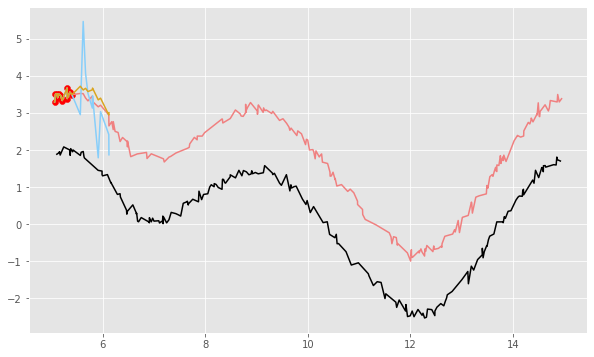

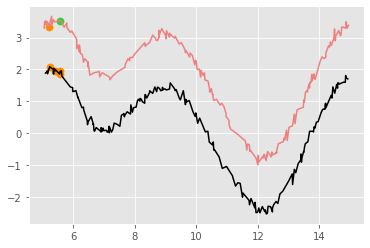

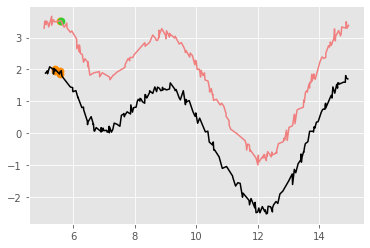

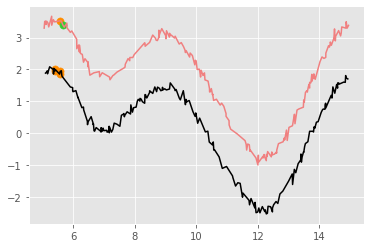

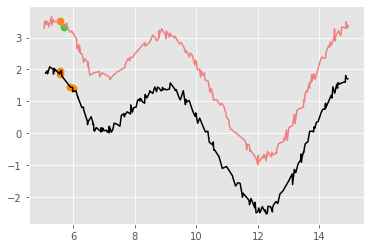

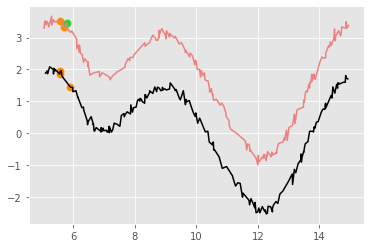

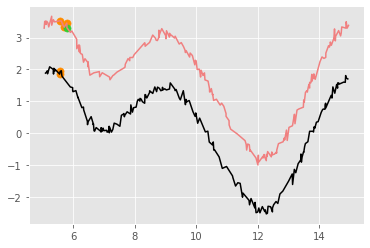

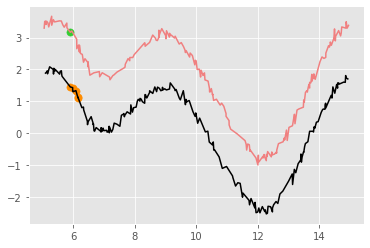

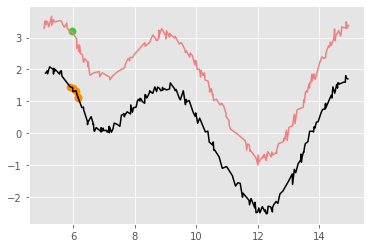

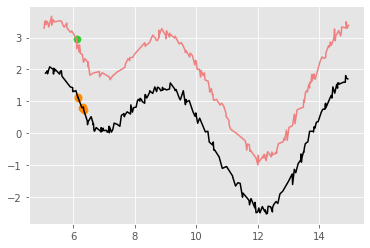

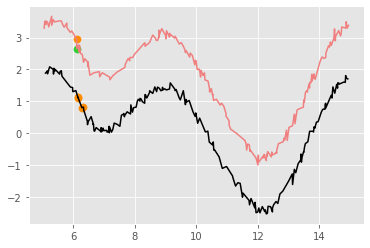

In [8]:
# for i in range(50):
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()
EPOCHS = 75; batch_s  = 64; run = 103; step = 0; train_steps = 35000; heads = 1; ℯ = 256; context = 10
l = [256, 256, 64, 32]
name_comp = 'run_' + str(run) 
logdir = save_dir + '/logs/' + name_comp
writer = tf.summary.create_file_writer(logdir)
folder = save_dir + '/ckpt/check_' + name_comp
#     lr_fn = tf.optimizers.schedules.PolynomialDecay(9e-3, train_steps, 1e-7, 2)
optimizer_c = tf.keras.optimizers.Adam(3e-4)
ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context,  d = d)
helpers.mkdir(folder)
decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)
if manager.latest_checkpoint:
    print("Restored from {}".format(manager.latest_checkpoint))
idx = int(np.random.choice(np.arange(0, 30000, 1), 1))
xx, yy, no_s_x1, no_s_y1, x_infer, em, s_y_inf,  n_s_x0_p, n_s_y0_p, n_s_x0, n_s_y0 = plotter.infer_plot2D(decoder, data[2][idx, :], data[6][idx, :], data[3][idx, :], data[0][idx, :], samples = 1, num_steps = 10, consec = True, order = True, context_p = 10)

In [11]:
import glob
from PIL import Image

# filepaths
fp_in = image_folder = '/Users/omernivron/Downloads/attention_plots/*.png'
fp_out = "/Users/omernivron/Downloads/image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=700, loop=0)



In [9]:
np.exp(0.09)

1.0941742837052104

In [15]:
np.random.normal(3.58, 1.1)

6.114804862631699